In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import hddm 
from patsy import dmatrix 
import numpy as np
from sys import platform
# print(hddm.__version__)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10
sns.set_context("notebook", font_scale=10, rc={"lines.linewidth": 10, "lines.markersize": 30})

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Pre-processing

In [7]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/67981492/'

In [8]:
!pwd
write_dir = home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

/home/krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs


In [9]:
all_sim_data = hddm.load_csv(home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/probC_sim_learning_signals_processed.csv')

In [10]:
all_sim_data.head(10)

Unnamed: 0       cpp  target_B  choice_B  cp  gen_drift  gen_bound     rt  \
0           0  0.025334  0.000000  0.000000   0   0.013572   0.416406  0.700   
1           1  0.022106  0.000000  0.000000   0   0.013572   0.525334  0.700   
2           2  0.020935  0.038001 -0.038001   0   0.013572   0.522106  0.700   
3           3  0.020345  0.070320 -0.070320   0   0.051574   0.520935  0.700   
4           4  0.646769  0.100251 -0.100251   0   0.121894   0.520345  0.700   
5           5  0.072232  0.128728 -0.128728   0   0.222144   1.146769  0.700   
6           6  0.026769 -1.359791  1.359791   0   0.350872   0.572232  0.700   
7           7  0.022626  0.398651 -0.398651   0   1.000000   0.526769  0.172   
8           8  0.021194  0.701844 -0.701844   0   0.601349   0.522626  0.332   
9           9  0.020494  0.829371 -0.829371   0   0.100495   0.521194  0.700   

     acc  subj_idx   ID cond  id_choices  correct_id_choices      b_t0  \
0  False         0  761   lc           0                   1  0.000000   
1  False         0  761   lc           0                   1  0.000000   
2  False         0  761   lc           0                   1  0.000000   
3  False         0  761   lc           0                   1  0.000000   
4  False         0  761   lc           0                   1  0.000000   
5  False         0  761   lc           0                   1  2.375416   
6  False         0  761   lc           0                   1  0.651961   
7  False         0  761   lc           0                   1  0.360797   
8  False         0  761   lc           0                   1  0.243166   
9  False         0  761   lc           0                   1  0.179307   

       b_t1   ideal_B  B_ideal_target  B_nonideal_target  
0  0.000000  0.000000        0.000000           0.000000  
1  0.038001  0.038001        0.038001           0.000000  
2  0.070320  0.070320        0.070320           0.000000  
3  0.100251  0.100251        0.100251           0.000000  
4  0.128728  0.128728        0.128728           0.000000  
5  1.015624 -1.359791        1.015624           2.375416  
6  1.050611  0.398651        1.050611           0.651961  
7  1.062641  0.701844        1.062641           0.360797  
8  1.072537  0.829371        1.072537           0.243166  
9  1.081596  0.902289        1.081596           0.179307

In [11]:
all_sim_data.columns = all_sim_data.columns.str.strip()
all_sim_data.head()

Unnamed: 0       cpp  target_B  choice_B  cp  gen_drift  gen_bound   rt  \
0           0  0.025334  0.000000  0.000000   0   0.013572   0.416406  0.7   
1           1  0.022106  0.000000  0.000000   0   0.013572   0.525334  0.7   
2           2  0.020935  0.038001 -0.038001   0   0.013572   0.522106  0.7   
3           3  0.020345  0.070320 -0.070320   0   0.051574   0.520935  0.7   
4           4  0.646769  0.100251 -0.100251   0   0.121894   0.520345  0.7   

     acc  subj_idx   ID cond  id_choices  correct_id_choices  b_t0      b_t1  \
0  False         0  761   lc           0                   1   0.0  0.000000   
1  False         0  761   lc           0                   1   0.0  0.038001   
2  False         0  761   lc           0                   1   0.0  0.070320   
3  False         0  761   lc           0                   1   0.0  0.100251   
4  False         0  761   lc           0                   1   0.0  0.128728   

    ideal_B  B_ideal_target  B_nonideal_target  
0  0.000000        0.000000                0.0  
1  0.038001        0.038001                0.0  
2  0.070320        0.070320                0.0  
3  0.100251        0.100251                0.0  
4  0.128728        0.128728                0.0

In [12]:
all_sim_data.columns

Index(['Unnamed: 0', 'cpp', 'target_B', 'choice_B', 'cp', 'gen_drift',
       'gen_bound', 'rt', 'acc', 'subj_idx', 'ID', 'cond', 'id_choices',
       'correct_id_choices', 'b_t0', 'b_t1', 'ideal_B', 'B_ideal_target',
       'B_nonideal_target'],
      dtype='object')

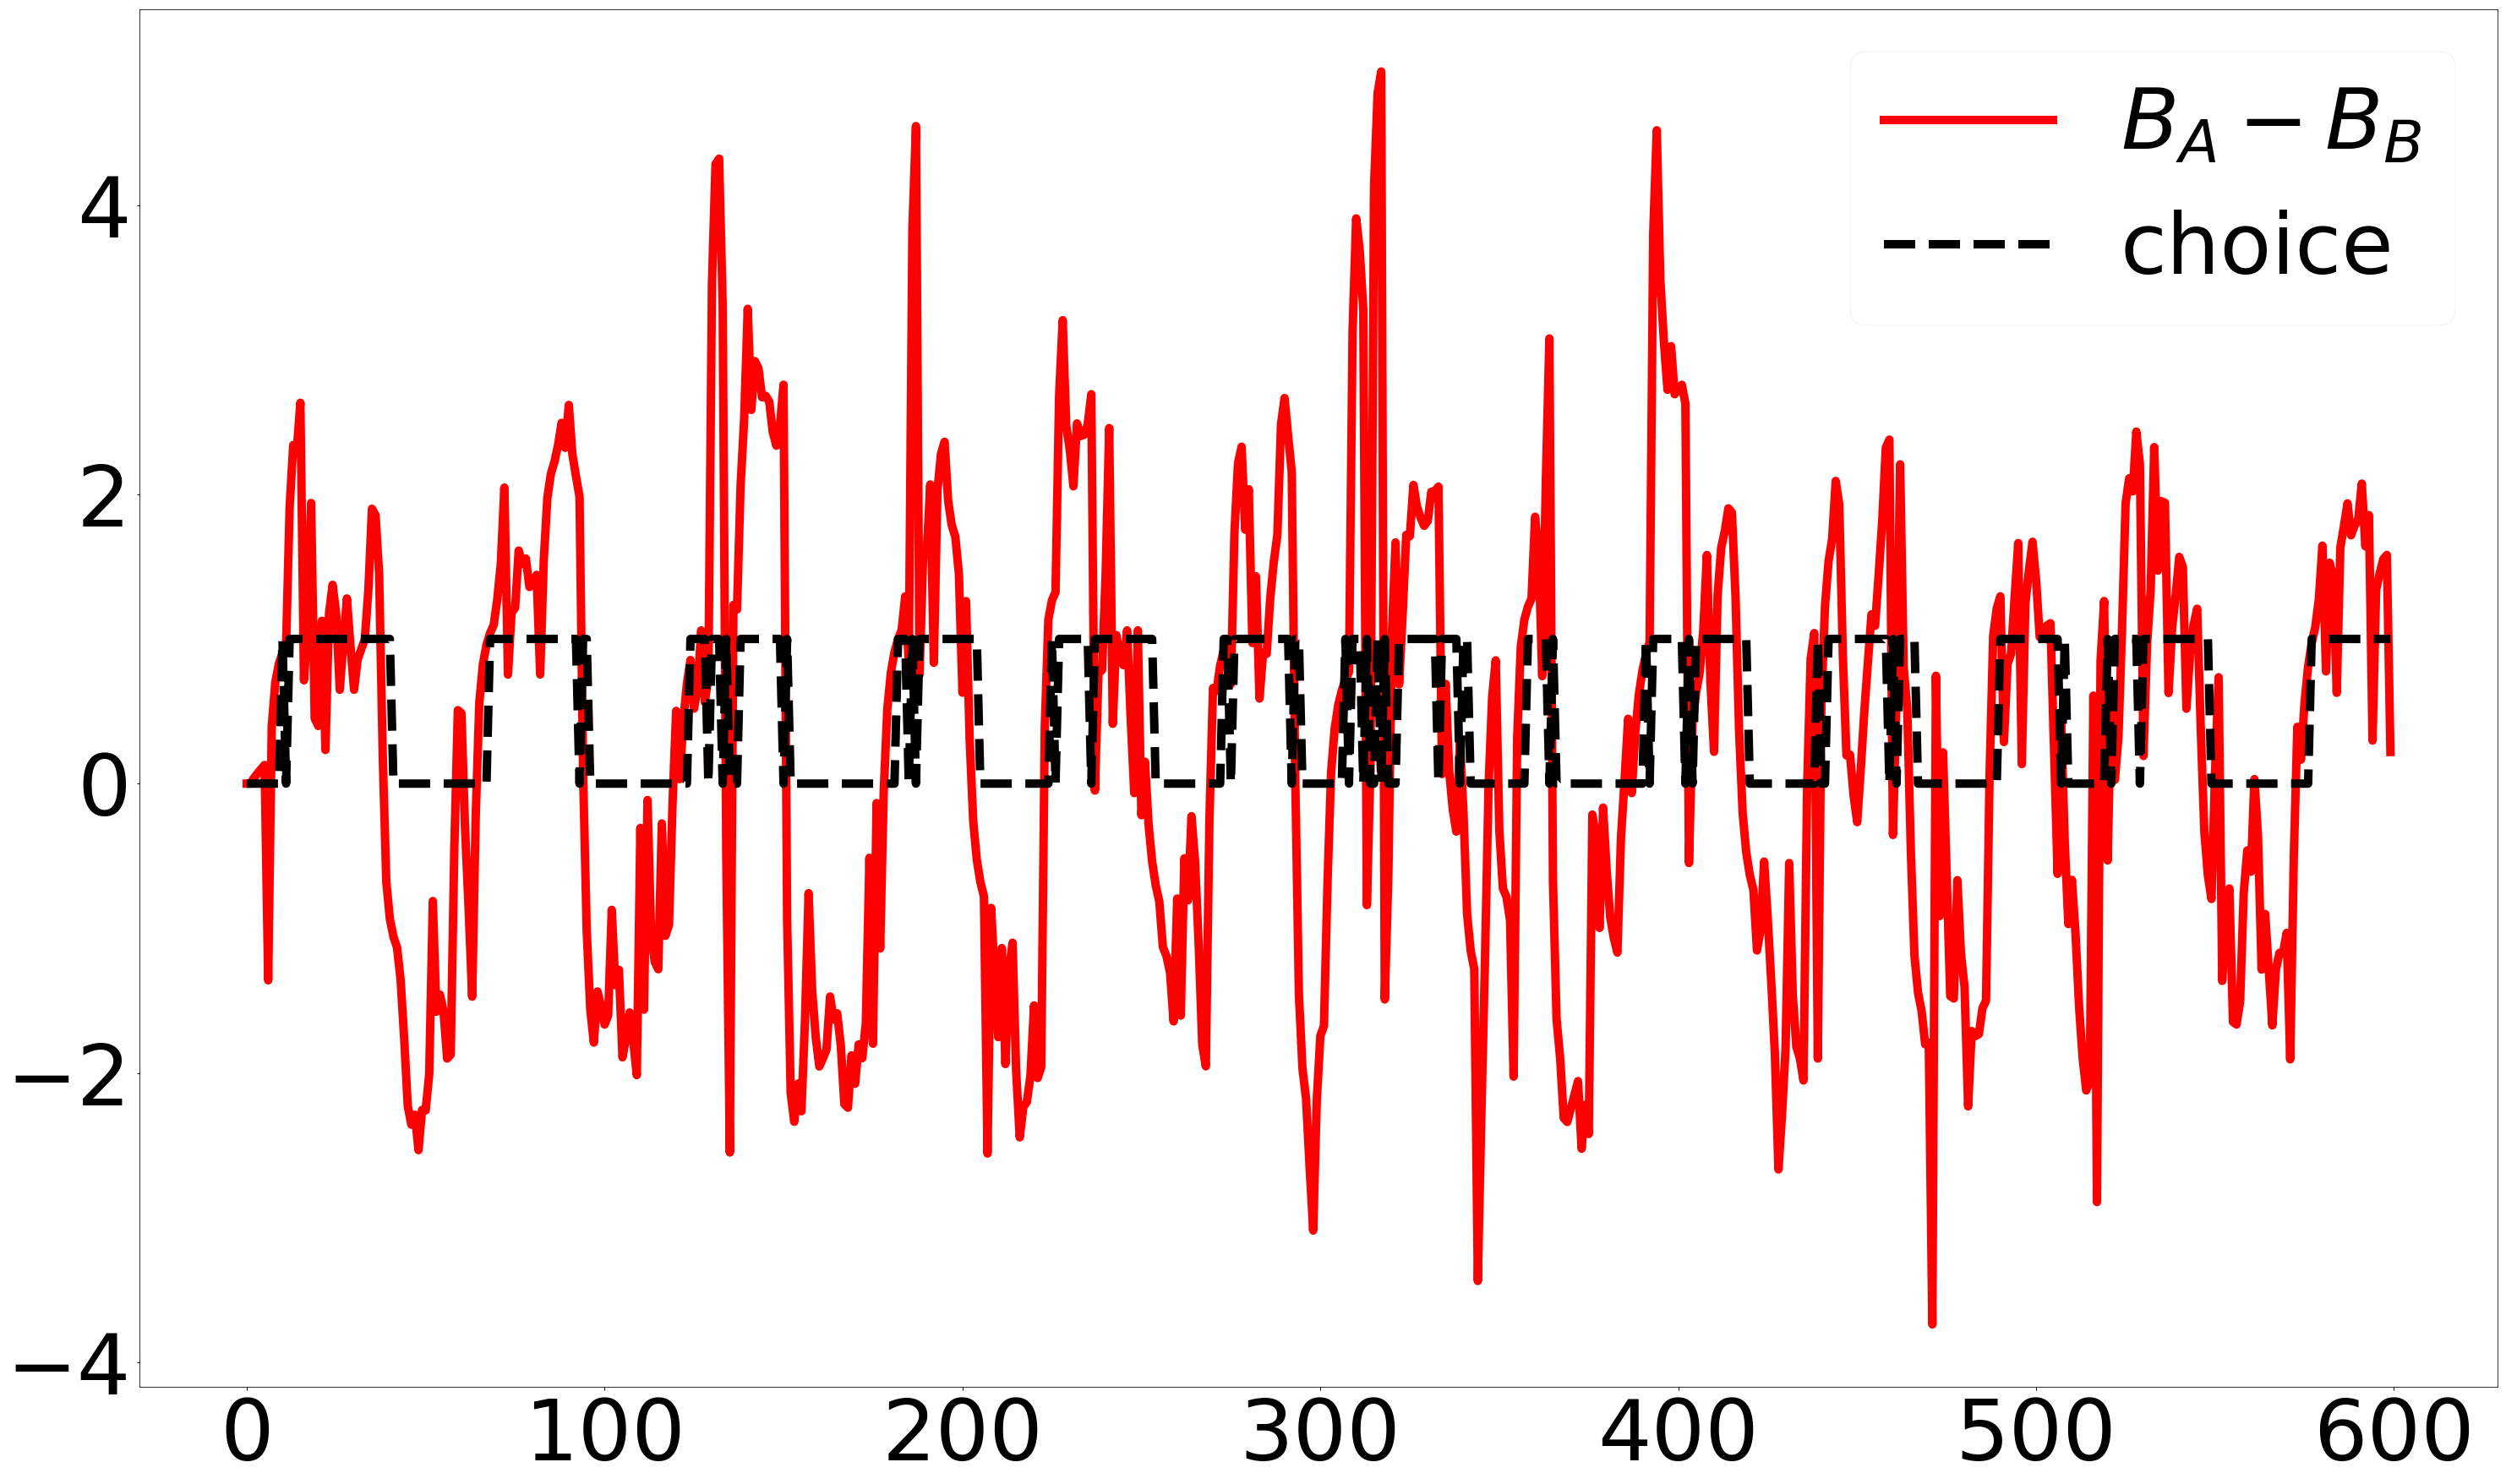

In [13]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.target_B[0:600], 'r', label='$B_{A} - B_{B}$')
plt.plot(all_sim_data.id_choices[0:600], 'k--', label='choice')
plt.legend()

Text(0,0.5,'$B_{choice} - B_{nonchoice}$')

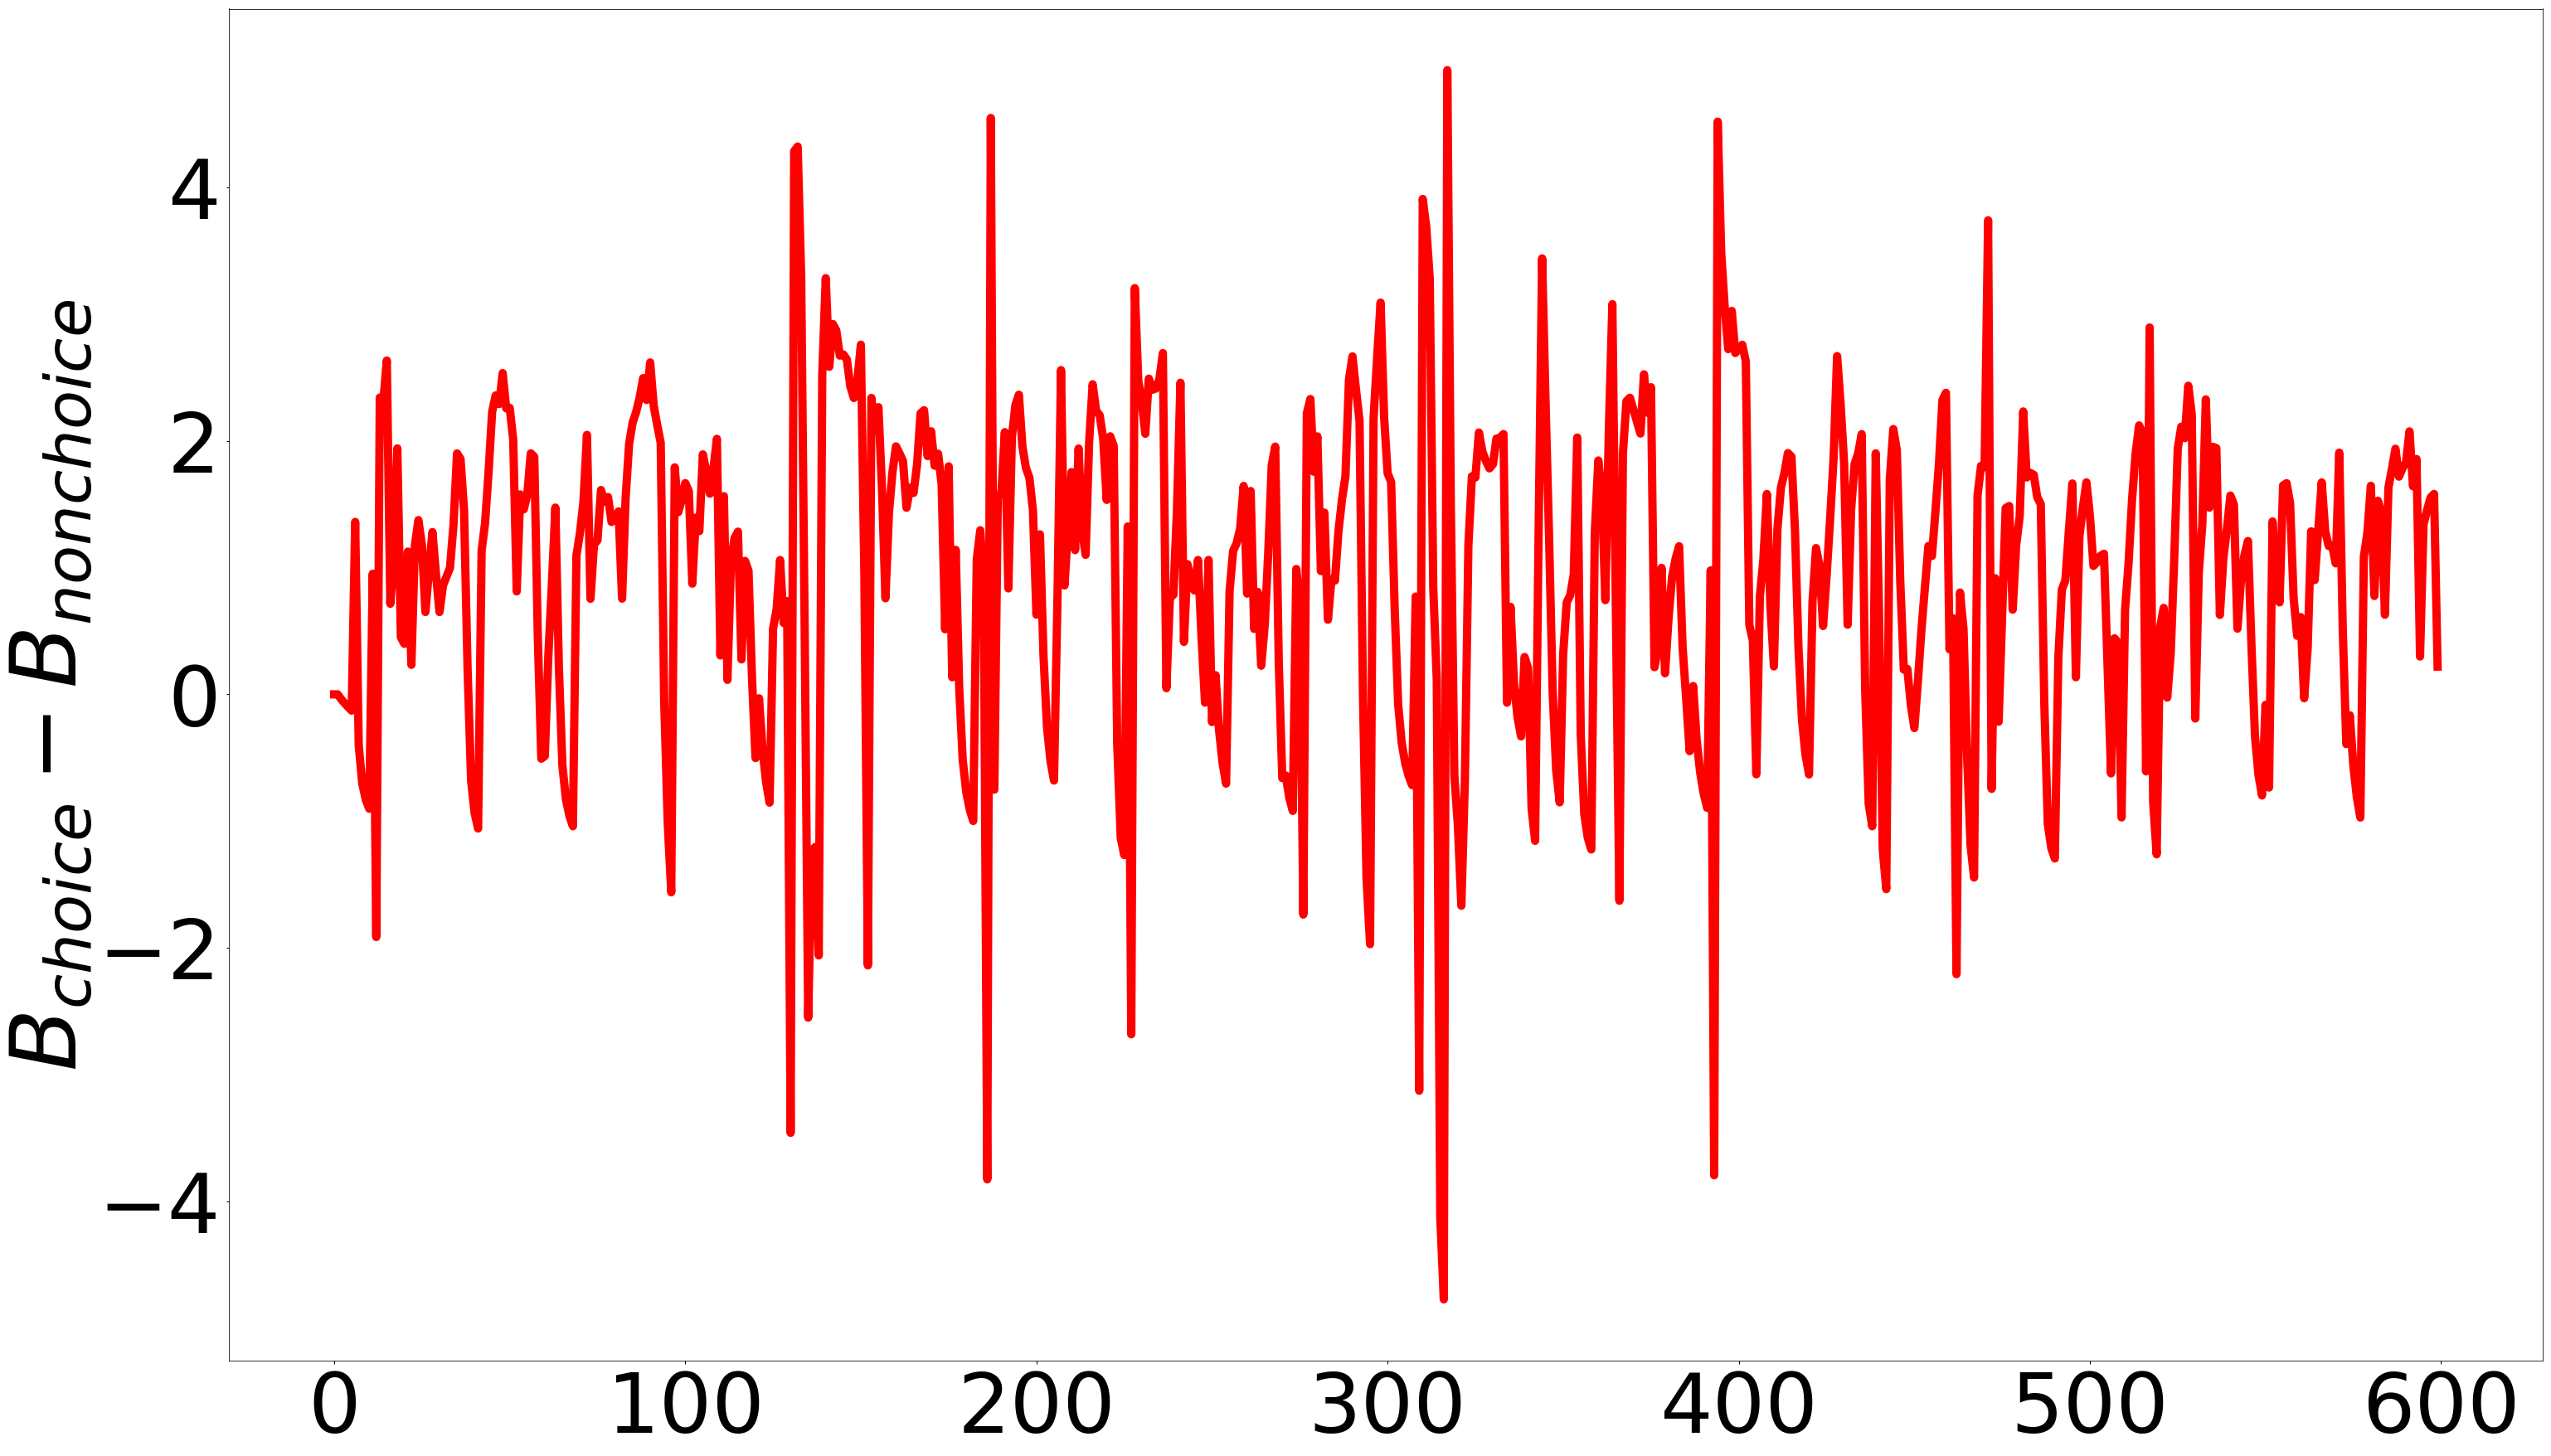

In [14]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.choice_B[0:600], 'r')
plt.ylabel('$B_{choice} - B_{nonchoice}$')

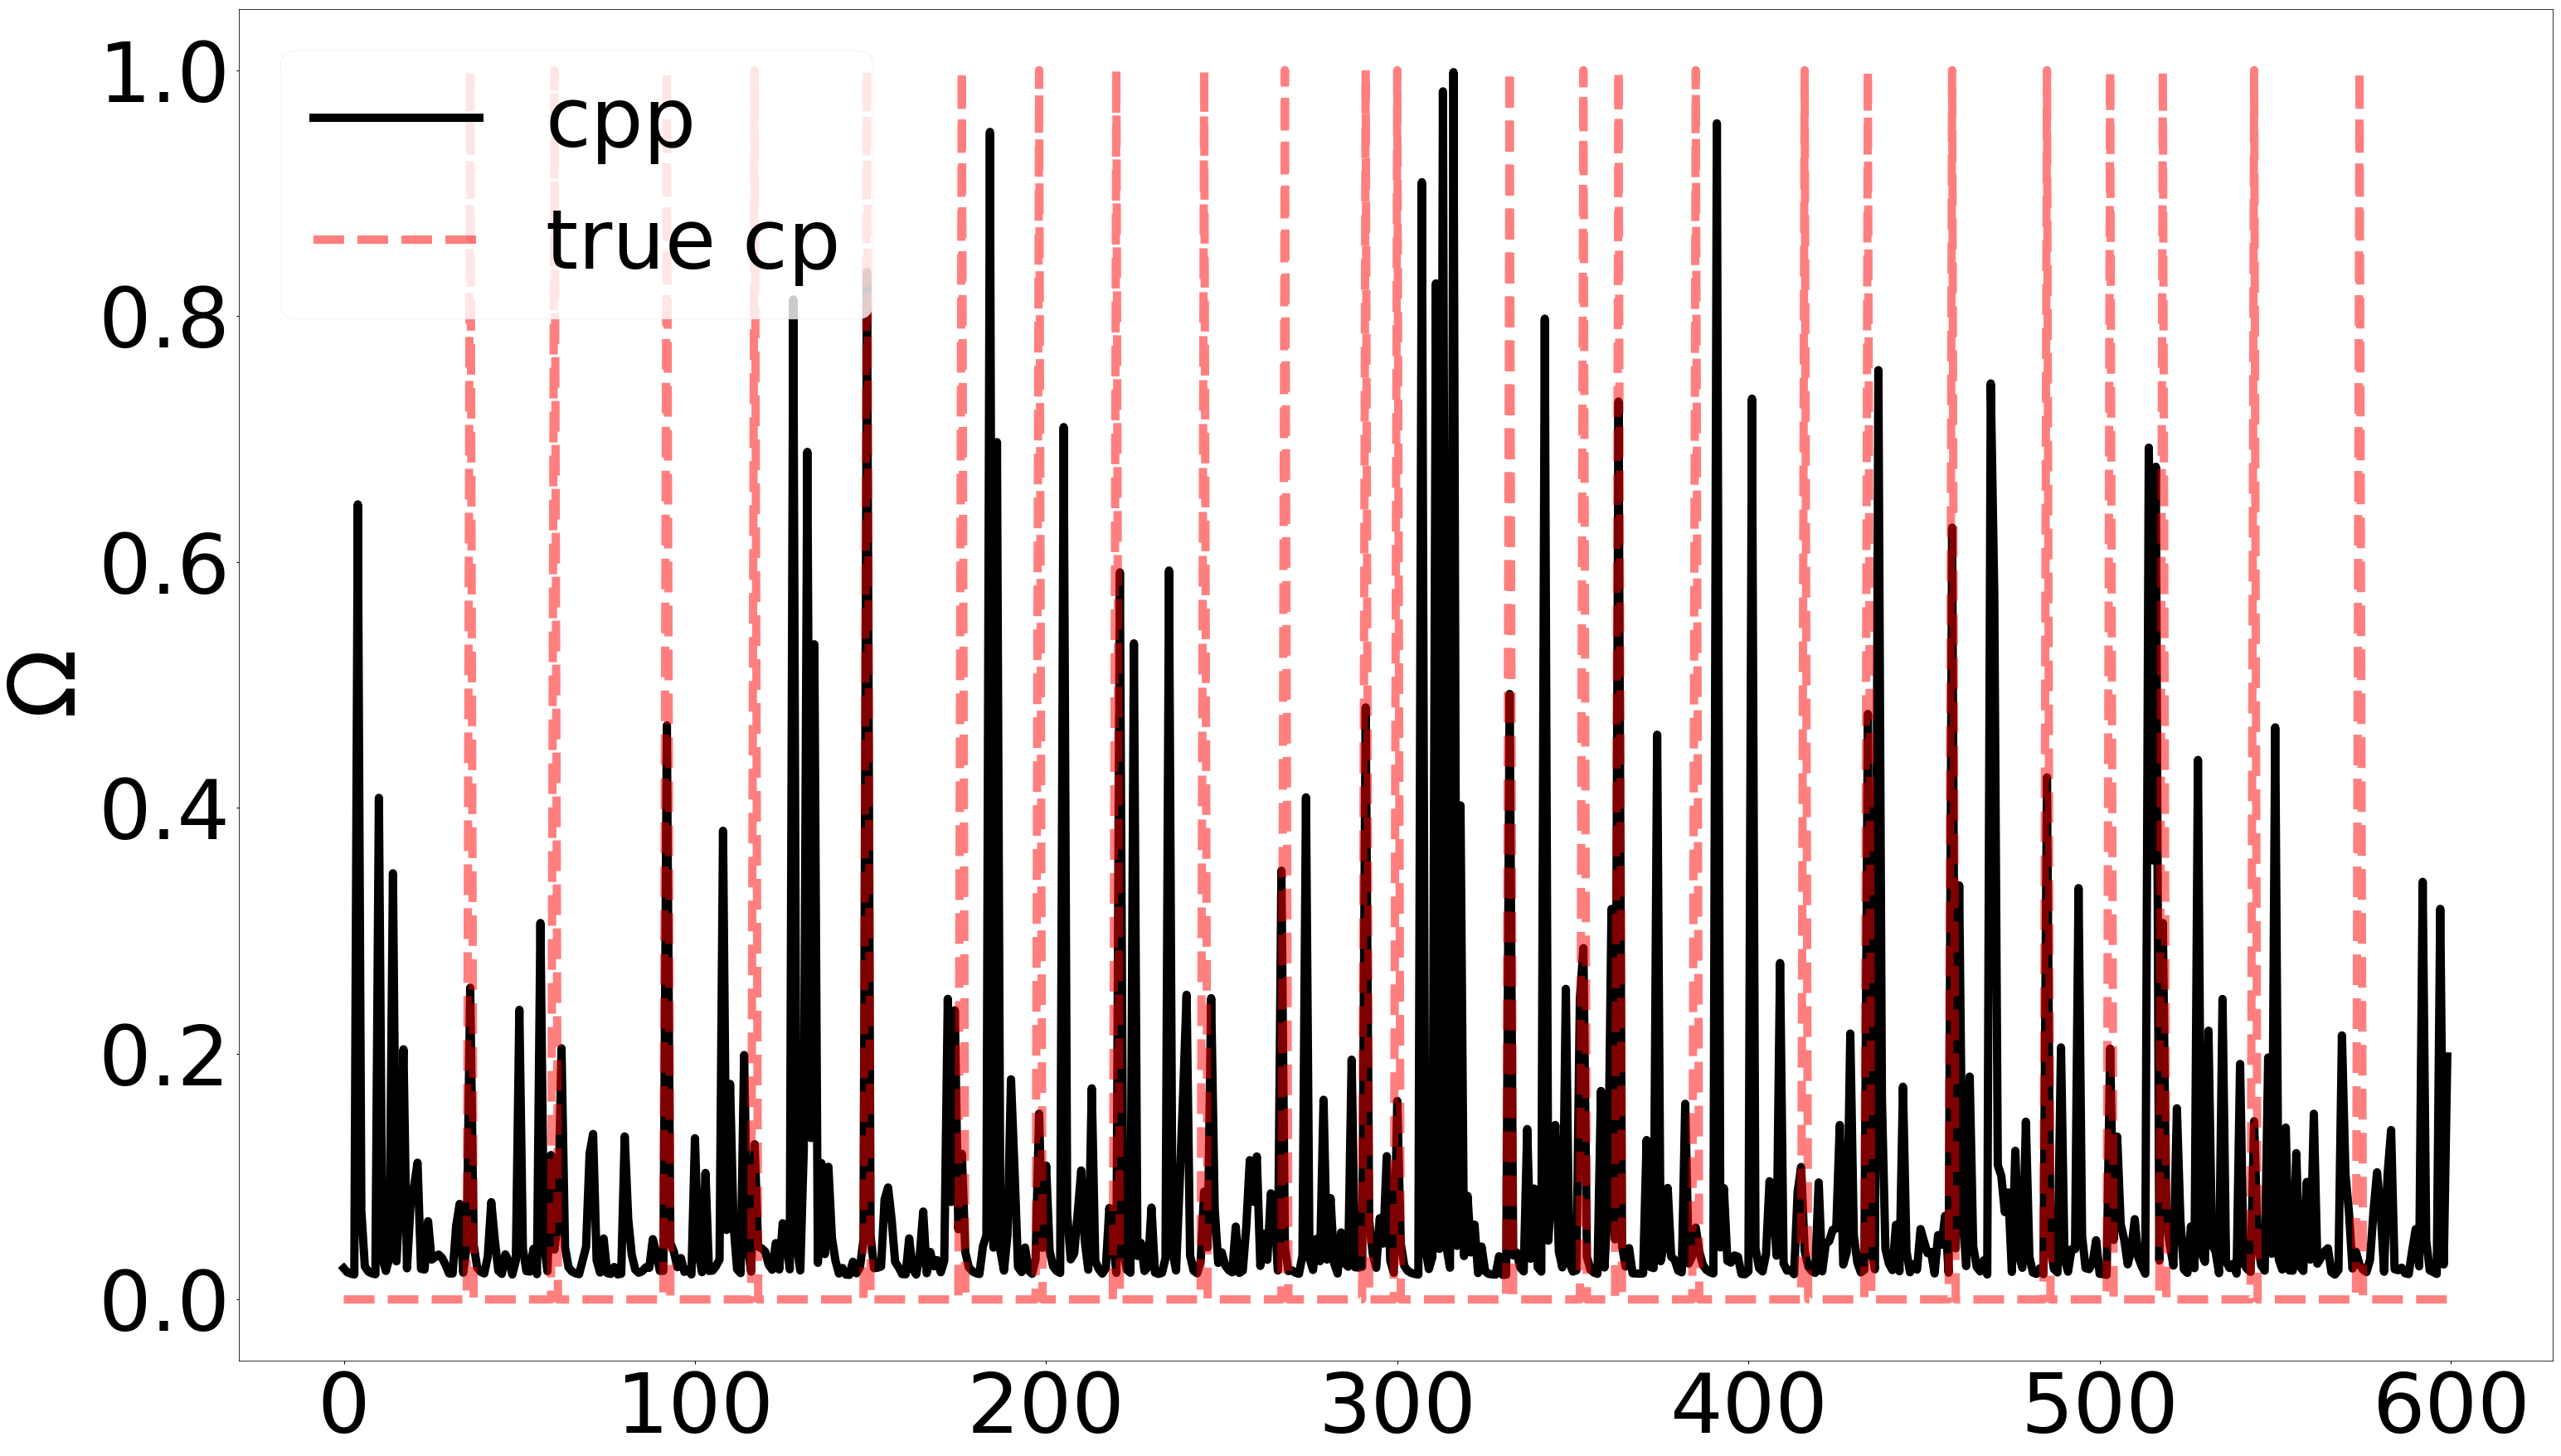

In [15]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.cpp[0:600], 'k', label='cpp')
plt.plot(all_sim_data.cp[0:600], 'r--', alpha=0.5, label='true cp')
plt.ylabel('$\Omega$')
plt.legend(frameon=1,loc='upper left')

In [16]:
#use target choice as response 
#include correct target choice as stimulus 
all_sim_data = all_sim_data.rename(index=str, columns={"id_choices": "response", 
                                                       "correct_id_choices": "stimulus"})
all_sim_data = all_sim_data[['response', 'stimulus', 'rt', 'cond', 'subj_idx', 'target_B', 'cpp']] 
# #use target-based belief in reward difference (b_t0 - b_t1)
all_sim_data = all_sim_data.rename(index=str, columns={'target_B': 'B'})
all_sim_data = all_sim_data[(all_sim_data.rt<0.6)]
all_sim_data.reset_index(drop=True, inplace=True)

In [17]:
all_sim_data['cond'] = all_sim_data['cond'].str.strip()
all_sim_data.head()

response  stimulus     rt cond  subj_idx         B       cpp
0         0         1  0.172   lc         0  0.398651  0.022626
1         0         1  0.332   lc         0  0.701844  0.021194
2         1         1  0.422   lc         0  0.902289  0.408017
3         1         1  0.352   lc         0  1.914075  0.023195
4         1         1  0.342   lc         0  2.340844  0.034013

In [18]:
np.unique(all_sim_data.subj_idx), np.unique(all_sim_data.cond)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array(['hc', 'hv', 'lc', 'lv'], dtype=object))

In [19]:
#these are no longer error flipped but stimulus flipped 
# all_sim_data = hddm.utils.flip_errors(all_sim_data)

In [20]:
# plt.rcParams['figure.figsize'] = 30, 10
# sns.set(font_scale=5)
# fig = plt.figure()
# ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
# for i, subj_data in all_sim_data.groupby('subj_idx'):
#     subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

In [21]:
all_sim_data.columns

Index(['response', 'stimulus', 'rt', 'cond', 'subj_idx', 'B', 'cpp'], dtype='object')

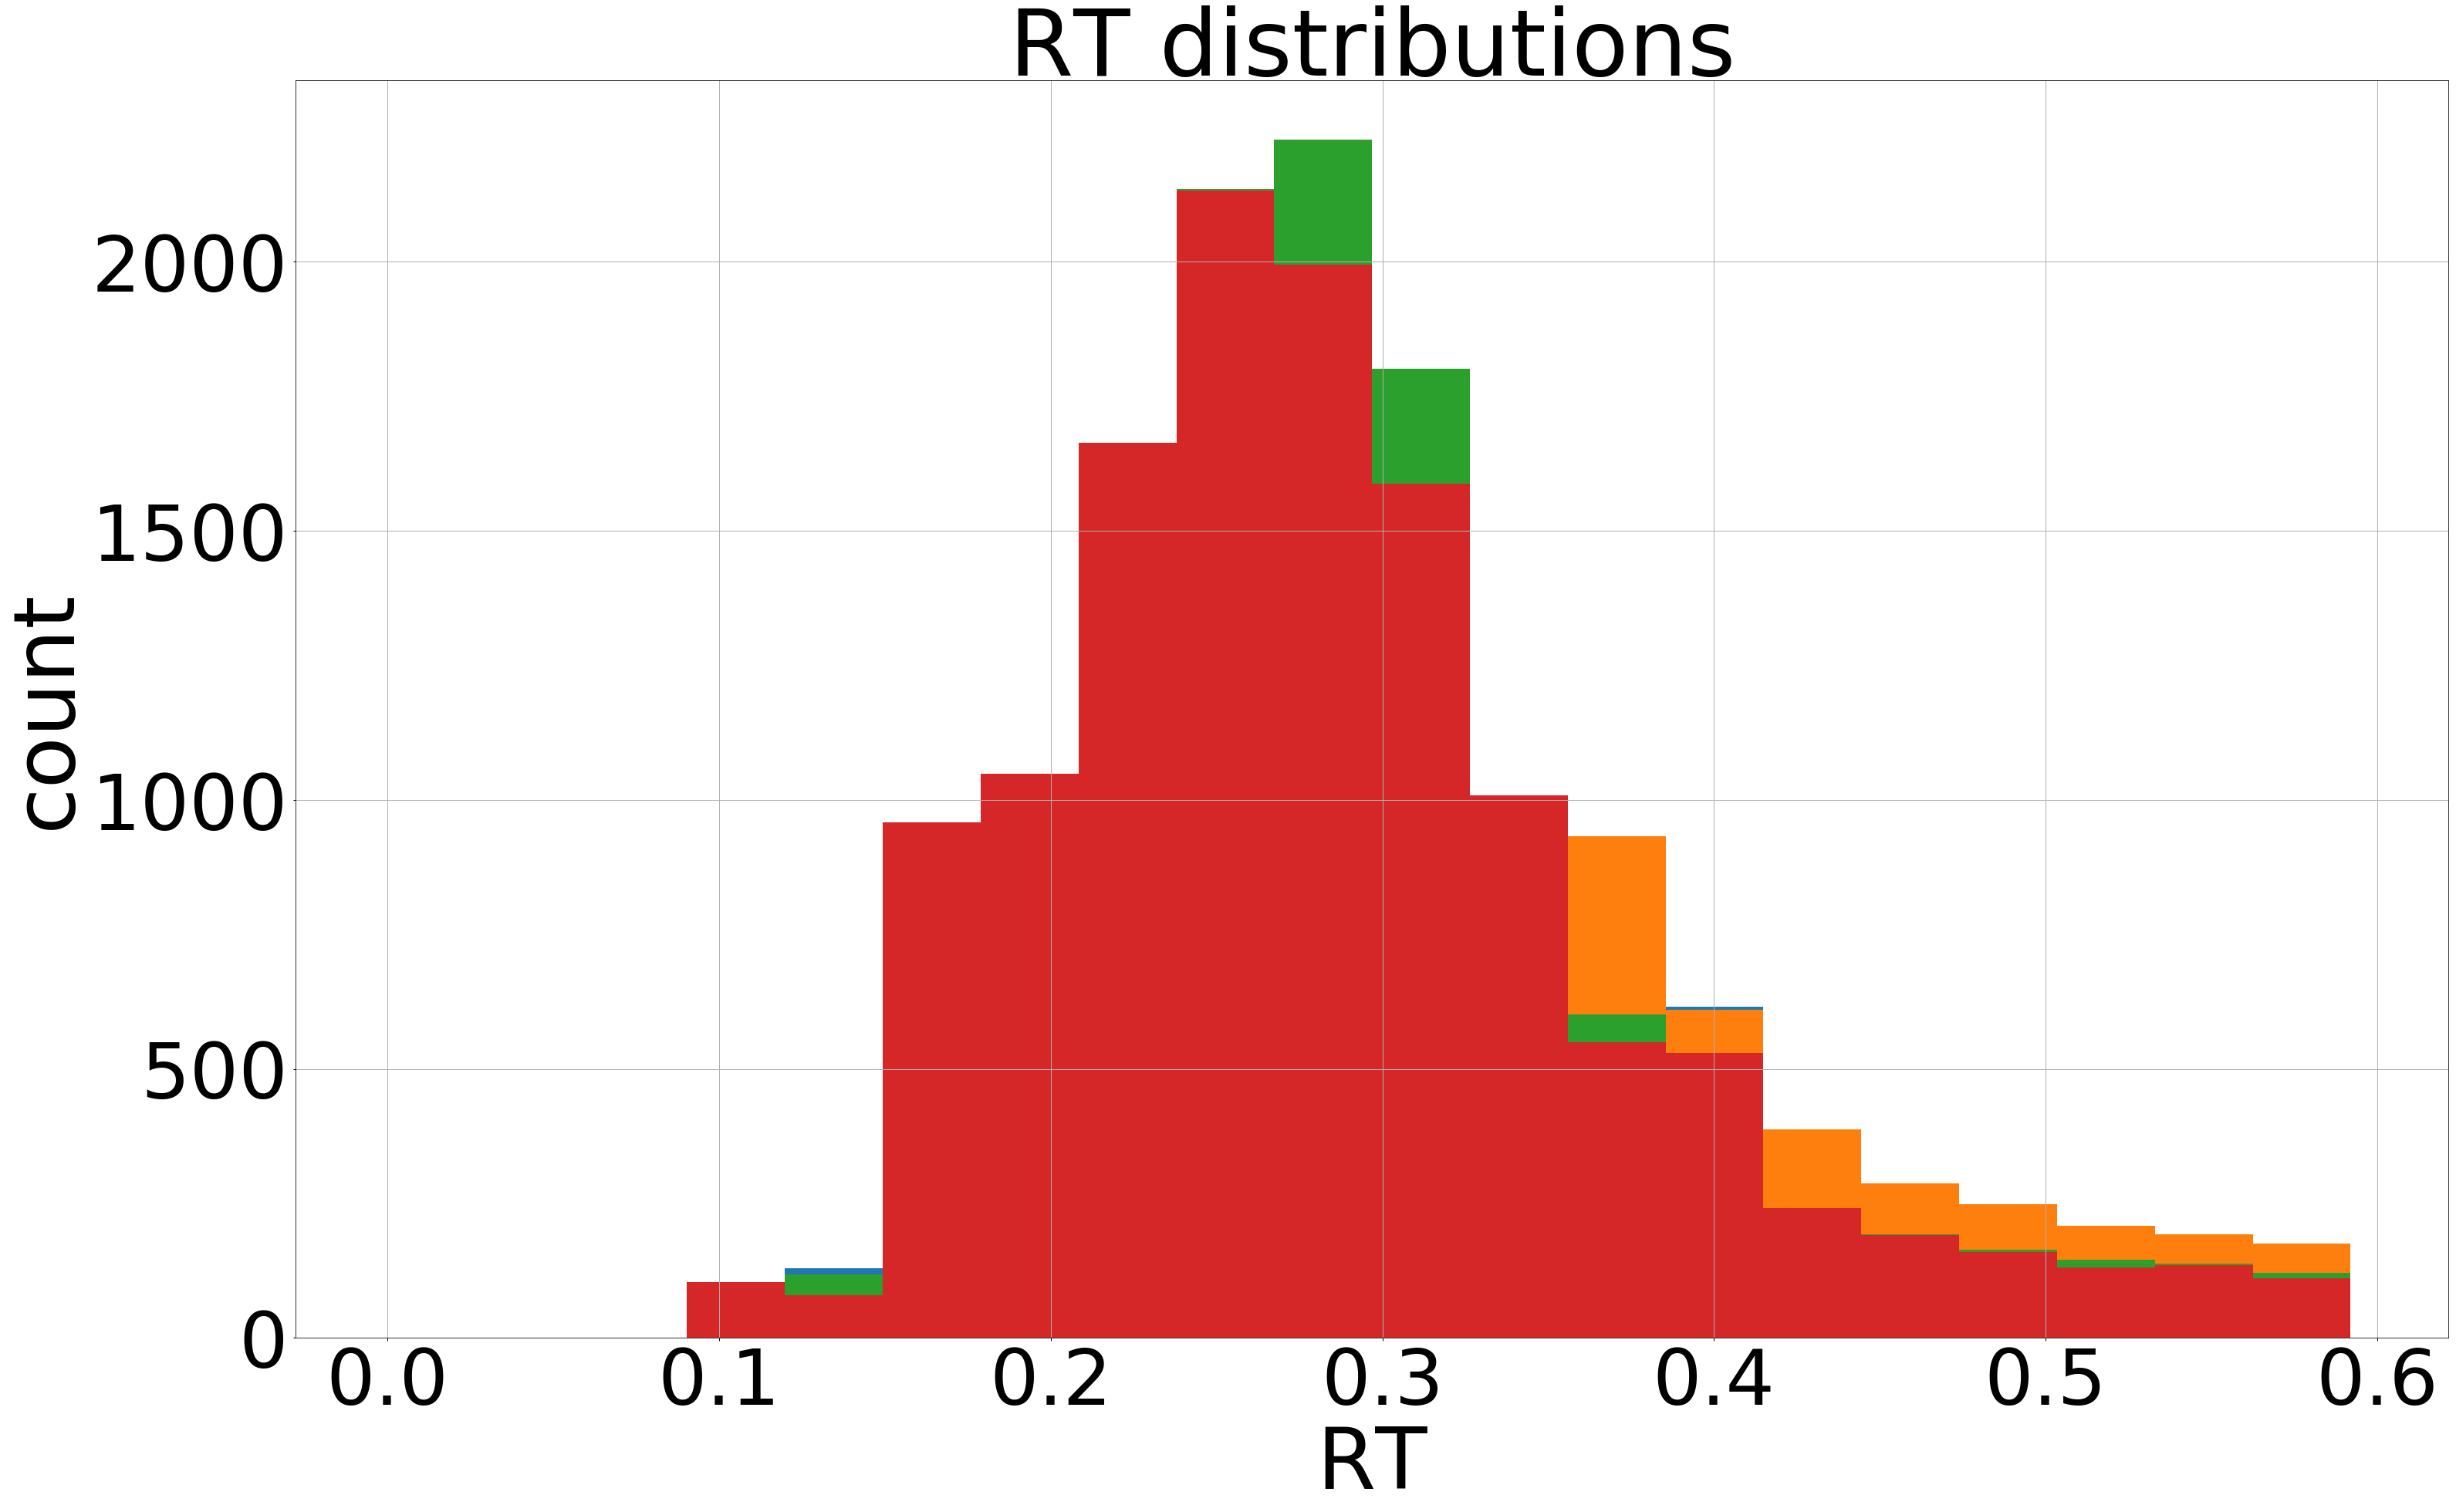

In [22]:
fig=plt.figure(figsize=(50,30))
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in all_sim_data.groupby('cond'):
    subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

Text(0,0.5,'B')

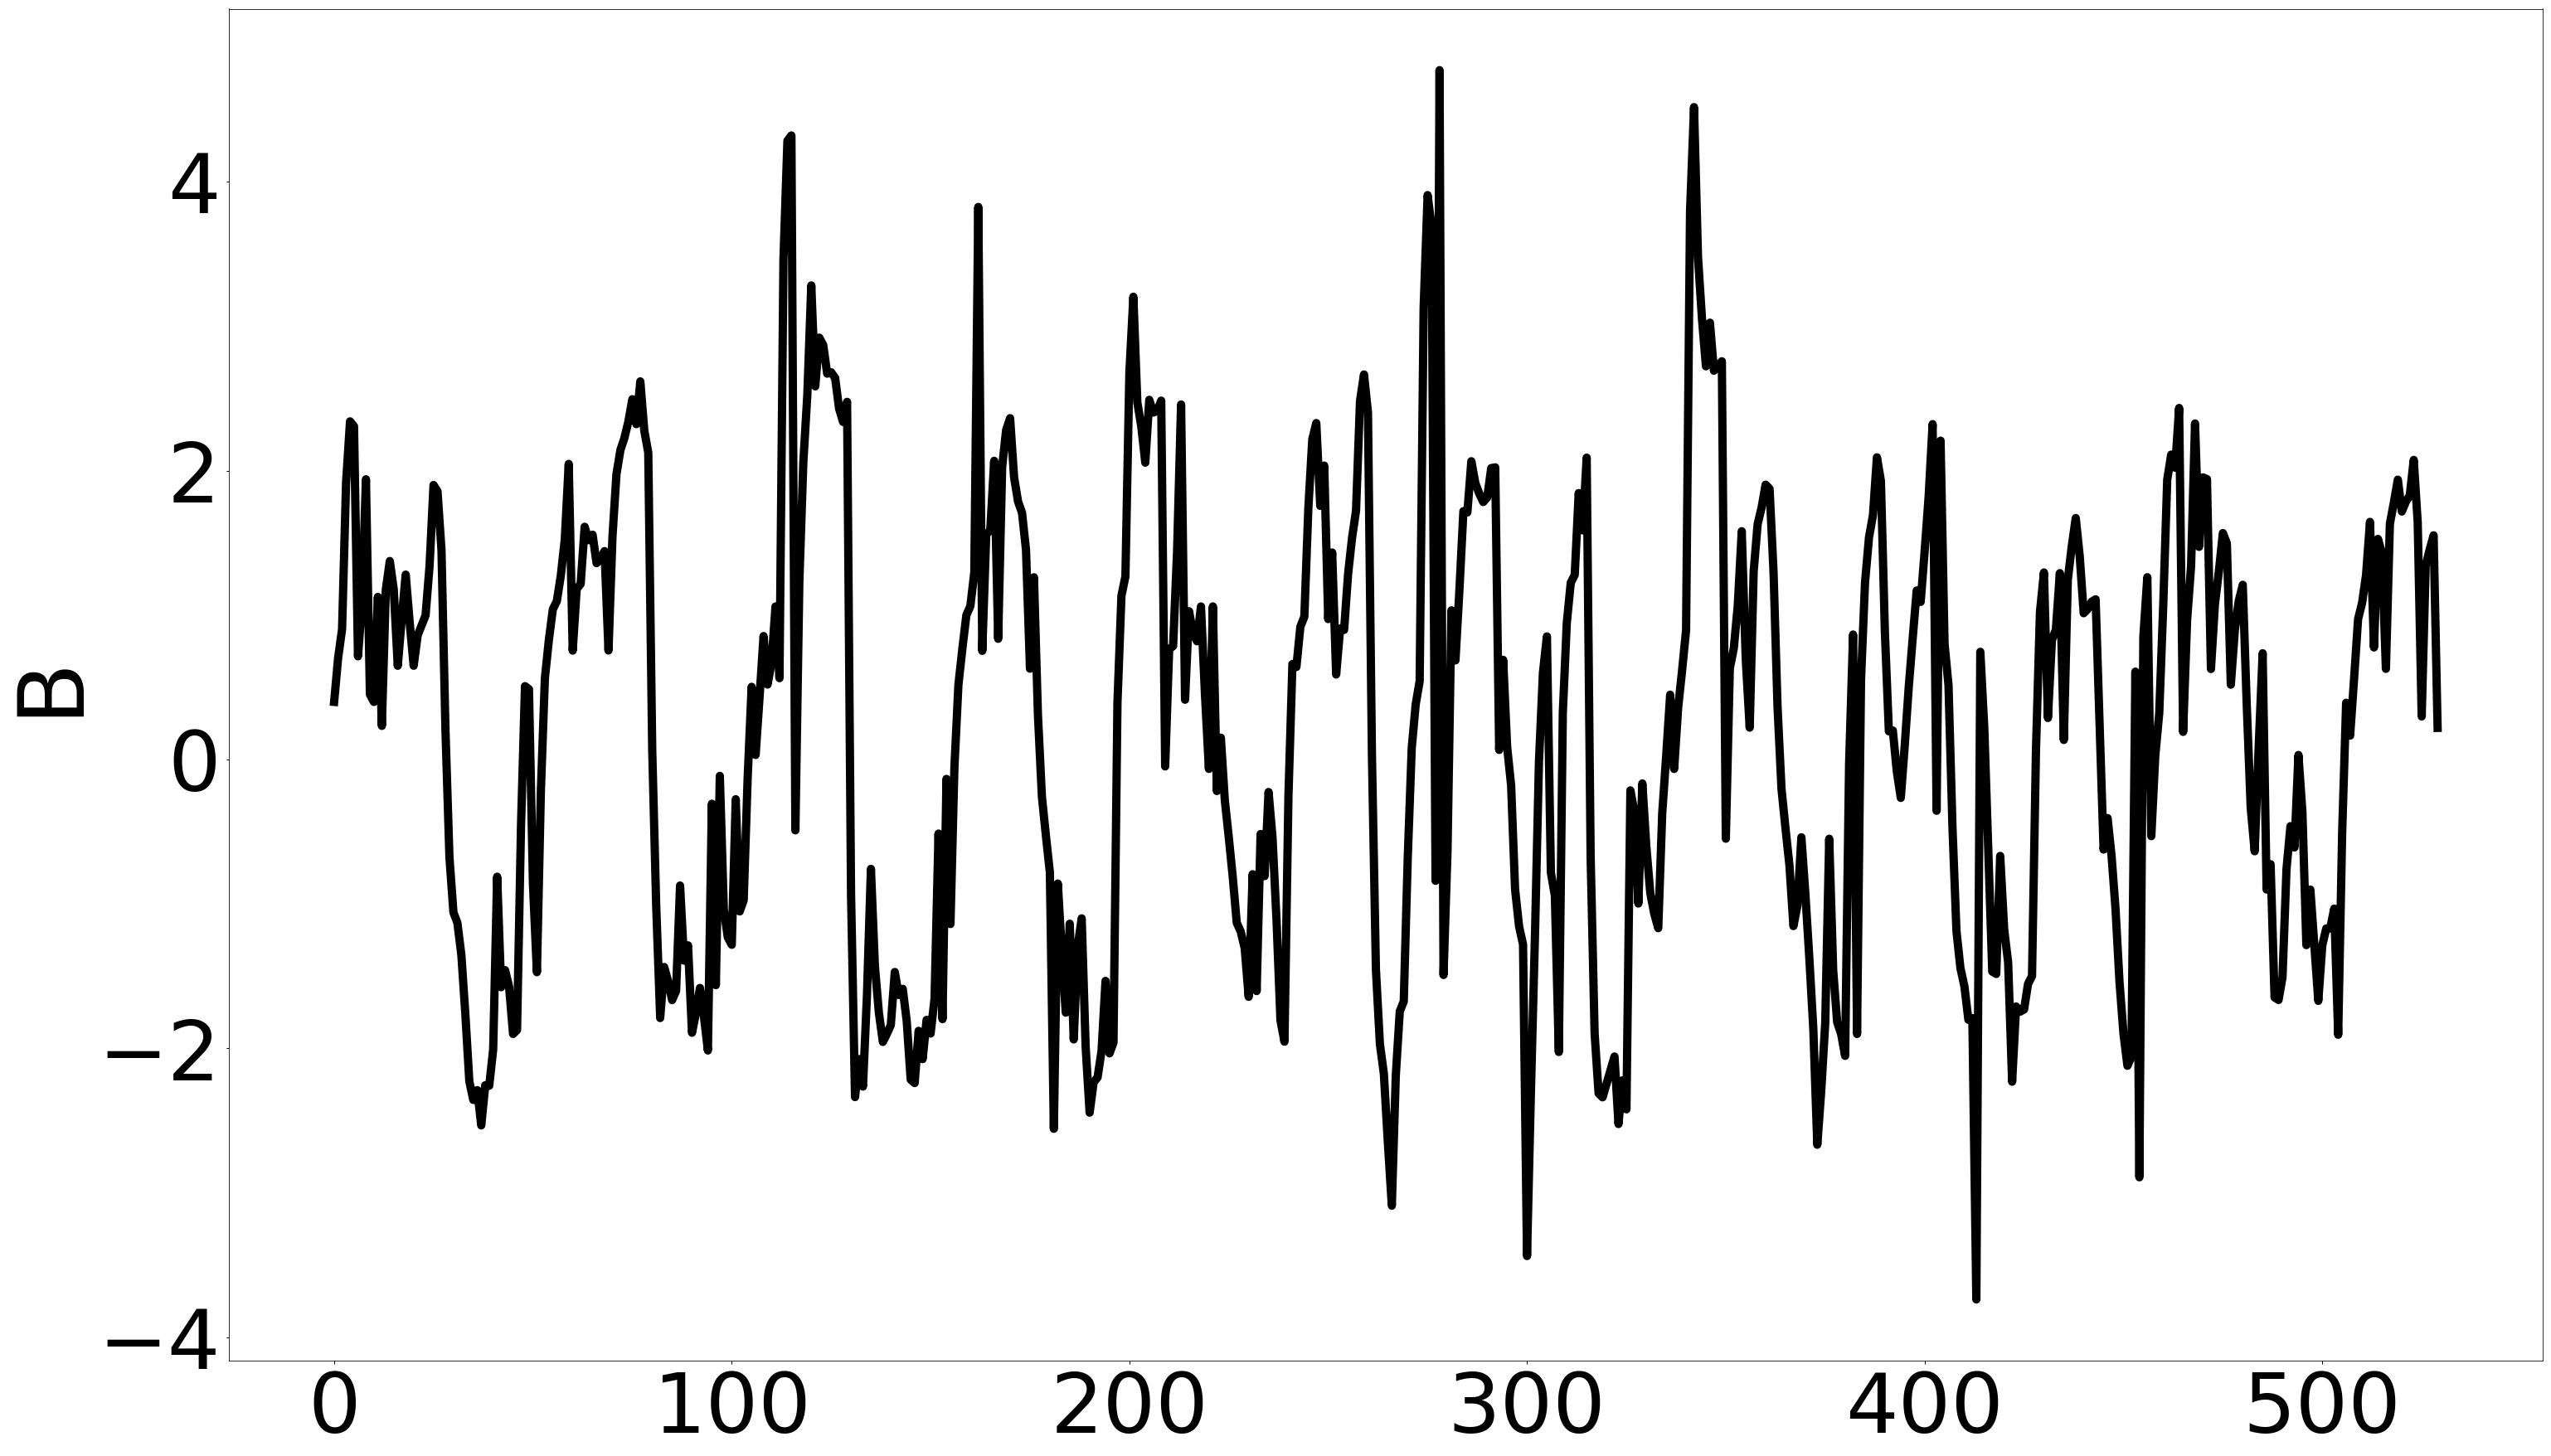

In [23]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.B[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('B')

Text(0,0.5,'stimulus selected')

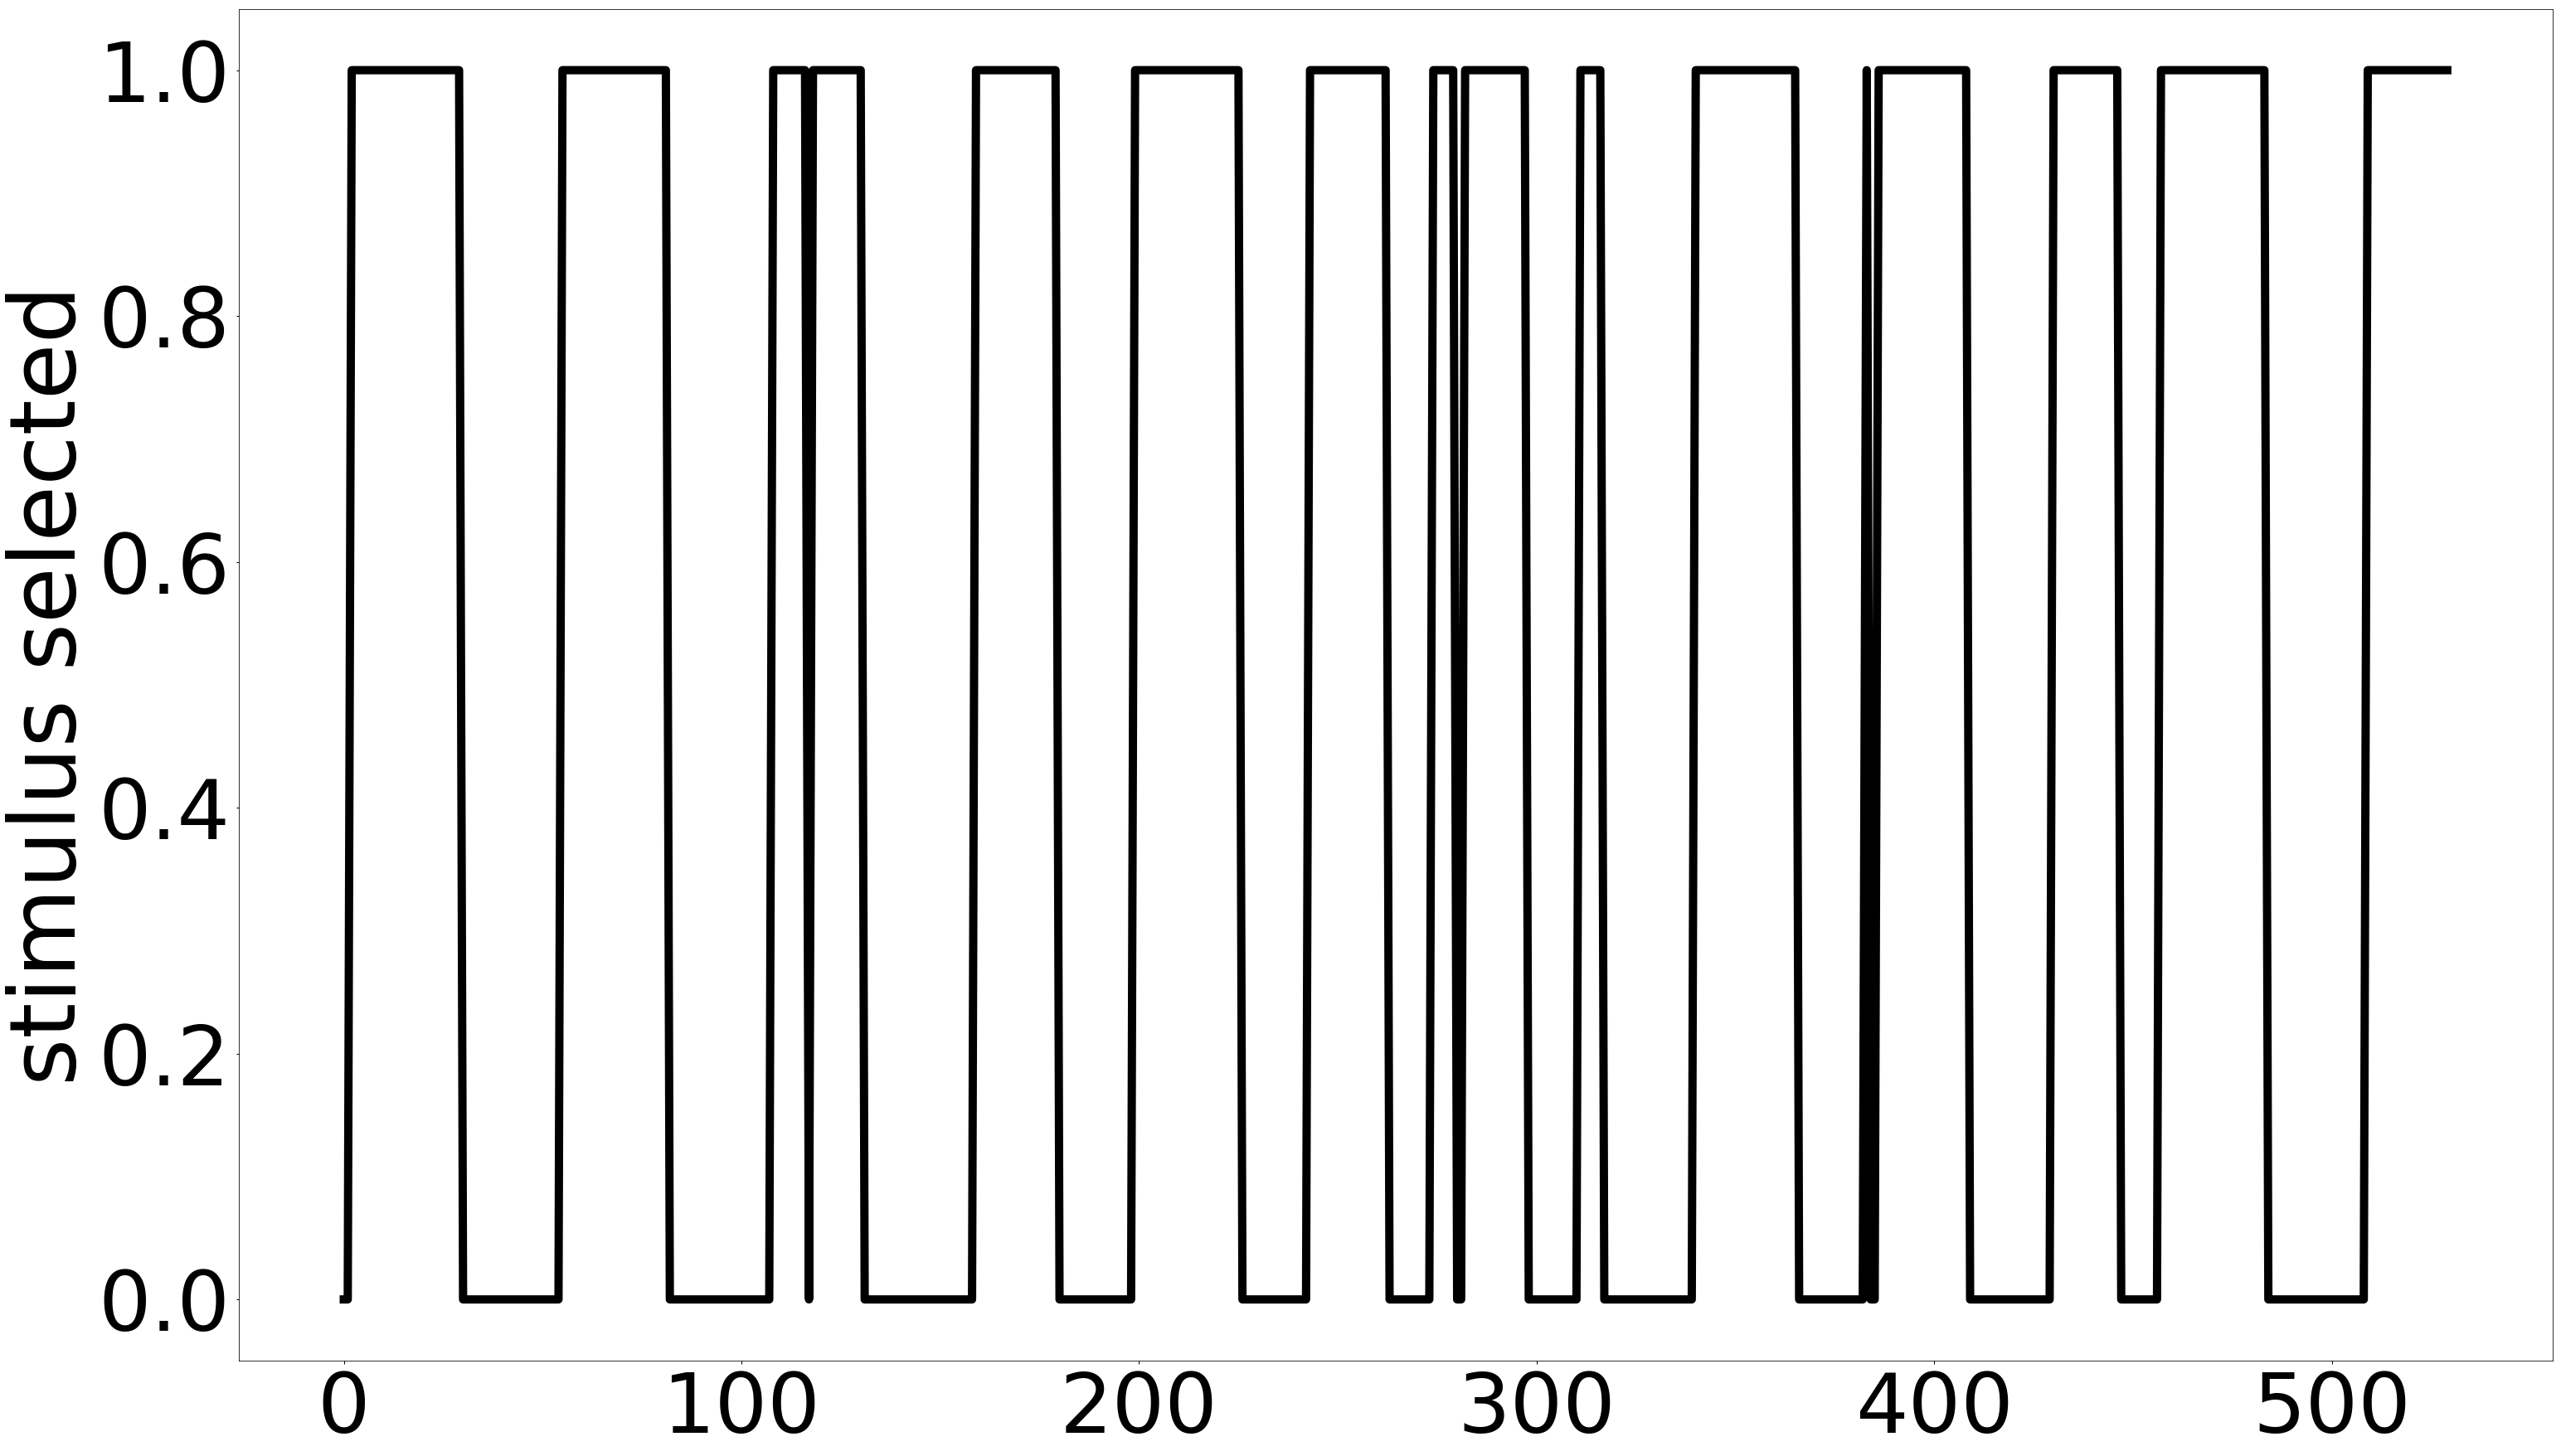

In [24]:
plt.figure(figsize=(50,30))
plt.plot(all_sim_data.response[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('stimulus selected')

In [25]:
all_sim_data.columns

Index(['response', 'stimulus', 'rt', 'cond', 'subj_idx', 'B', 'cpp'], dtype='object')

Text(0,0.5,'simulated rt')

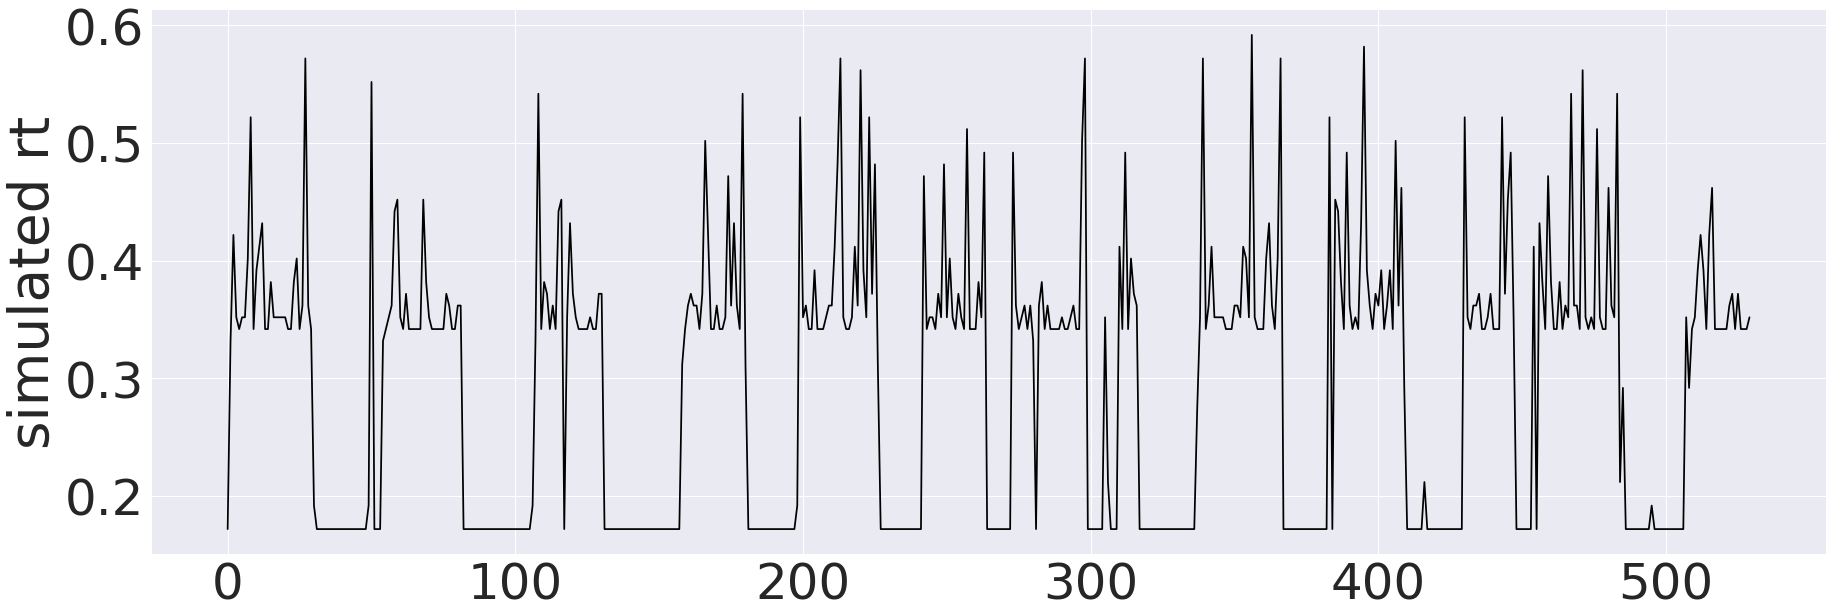

In [26]:
plt.rcParams['figure.figsize'] = 30, 10
sns.set(font_scale=5)
fig = plt.figure()
plt.plot(all_sim_data.rt[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('simulated rt')

Text(0,0.5,'correct stimulus')

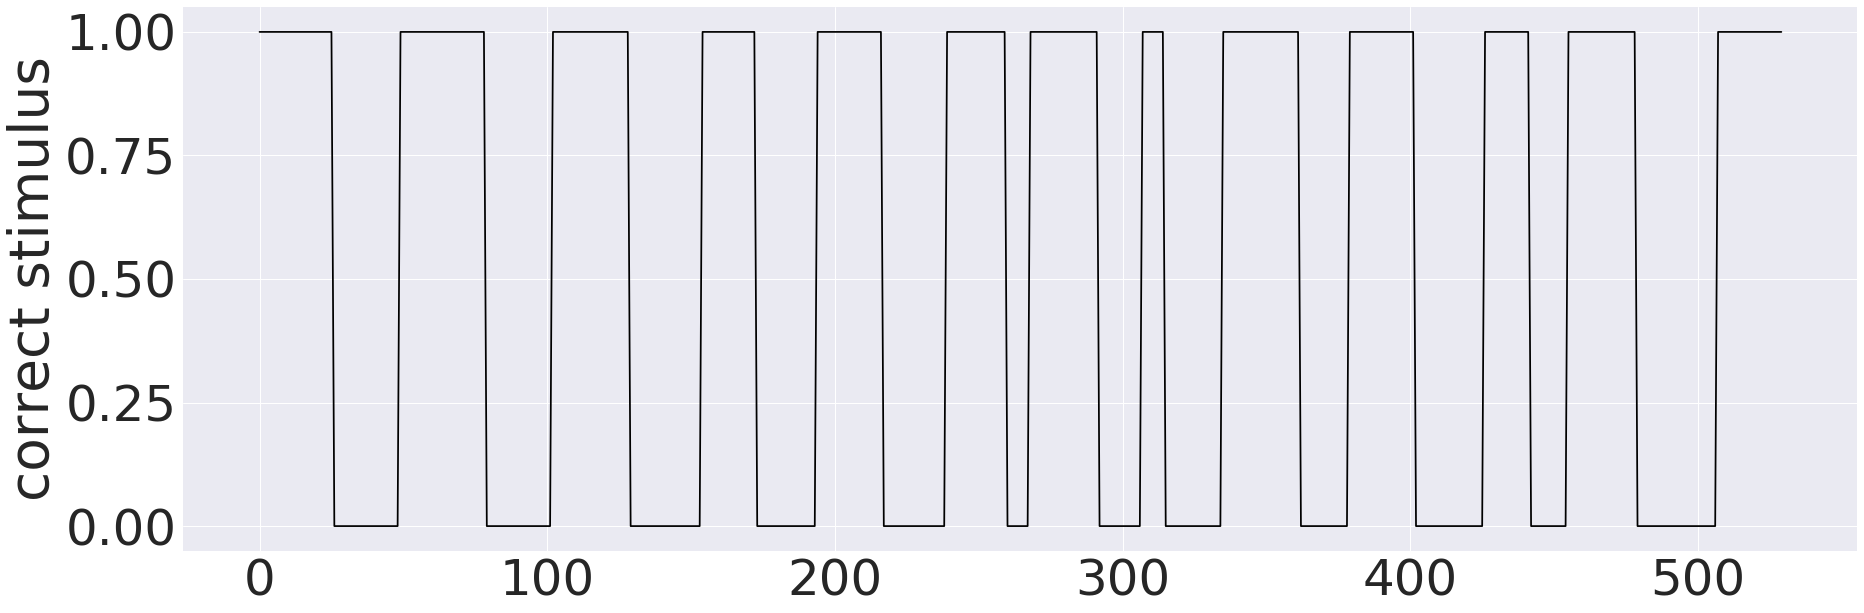

In [27]:
plt.plot(all_sim_data.stimulus[(all_sim_data.subj_idx == 0) & (all_sim_data.cond == 'lc')], 'k')
plt.ylabel('correct stimulus')

In [74]:
include=['v', 'a', 't']

n_samples, n_burned_samples, n_thin = 10000, 5000, 5

In [75]:
#get all permutations of a,t,v
#hold position of learning signals constant to get all combinations 
#of learning signal and parameter pairs 
from itertools import permutations
from more_itertools import chunked

targets = ['a~', 't~', 'v~']
signals = (('cpp:C(cond)', 'B:C(cond)'),)
param_pairs = list(permutations(targets, 2))
learning_signal_pairs = signals*(int(len(param_pairs)/len(signals)))

print(learning_signal_pairs)
print(param_pairs)

(('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'), ('cpp:C(cond)', 'B:C(cond)'))
[('a~', 't~'), ('a~', 'v~'), ('t~', 'a~'), ('t~', 'v~'), ('v~', 'a~'), ('v~', 't~')]


In [76]:
tuple_idx = np.repeat(list(np.arange(len(learning_signal_pairs))),2)
tuple_element_idx = [0,1]*len(learning_signal_pairs)
models = [param_pairs[t_idx][e_idx] + learning_signal_pairs[t_idx][e_idx] for t_idx,e_idx in zip(tuple_idx, tuple_element_idx)]

In [77]:
reg_descriptions = list(chunked(models,2))
print(reg_descriptions)

model_dict = {'a_cpp_t_B': reg_descriptions[0], 'a_cpp_v_B': reg_descriptions[1],
't_cpp_a_B': reg_descriptions[2], 't_cpp_v_B': reg_descriptions[3], 
'v_cpp_a_B': reg_descriptions[4], 'v_cpp_t_B': reg_descriptions[5]}

[['a~cpp:C(cond)', 't~B:C(cond)'], ['a~cpp:C(cond)', 'v~B:C(cond)'], ['t~cpp:C(cond)', 'a~B:C(cond)'], ['t~cpp:C(cond)', 'v~B:C(cond)'], ['v~cpp:C(cond)', 'a~B:C(cond)'], ['v~cpp:C(cond)', 't~B:C(cond)']]


In [78]:
a_cpp_t_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['a_cpp_t_B'], include=include)
a_cpp_t_B_sim_reg.find_starting_values()
a_cpp_t_B_sim_reg.sample(n_samples,burn=n_burned_samples, dbname='a_cpp_t_B_sim_reg.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp:C(cond)[hc]', 'a_cpp:C(cond)[hv]', 'a_cpp:C(cond)[lc]', 'a_cpp:C(cond)[lv]']
Adding these covariates:
['t_Intercept', 't_B:C(cond)[hc]', 't_B:C(cond)[hv]', 't_B:C(cond)[lc]', 't_B:C(cond)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 10001 of 10000 complete in 31022.1 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

Plotting v
Plotting v_std
Plotting a_Intercept
Plotting a_Intercept_std
Plotting a_cpp:C(cond)[hc]
Plotting a_cpp:C(cond)[hv]
Plotting a_cpp:C(cond)[lc]
Plotting a_cpp:C(cond)[lv]
Plotting t_Intercept
Plotting t_Intercept_std
Plotting t_B:C(cond)[hc]
Plotting t_B:C(cond)[hv]
Plotting t_B:C(cond)[lc]
Plotting t_B:C(cond)[lv]


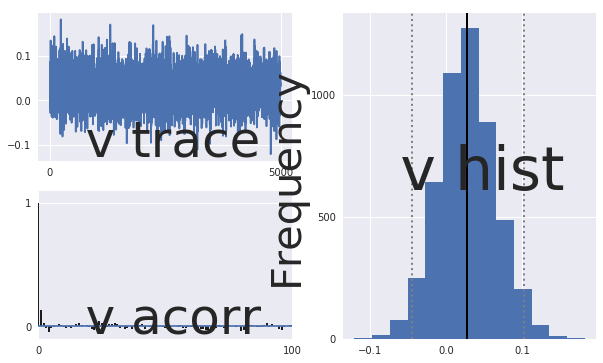

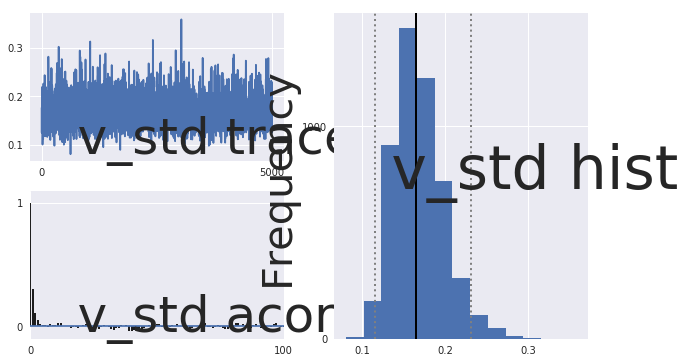

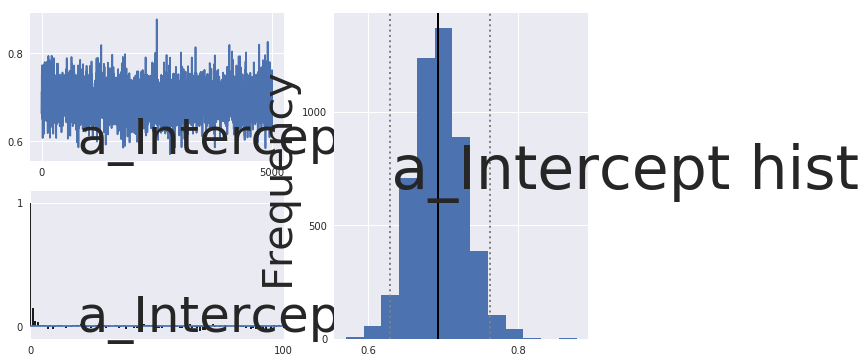

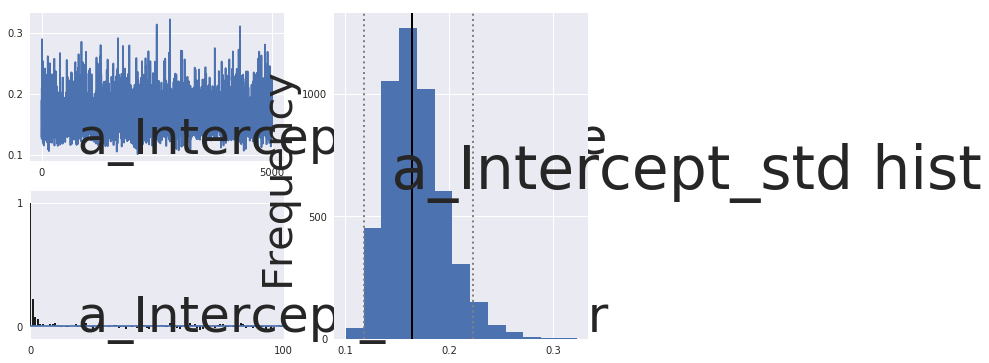

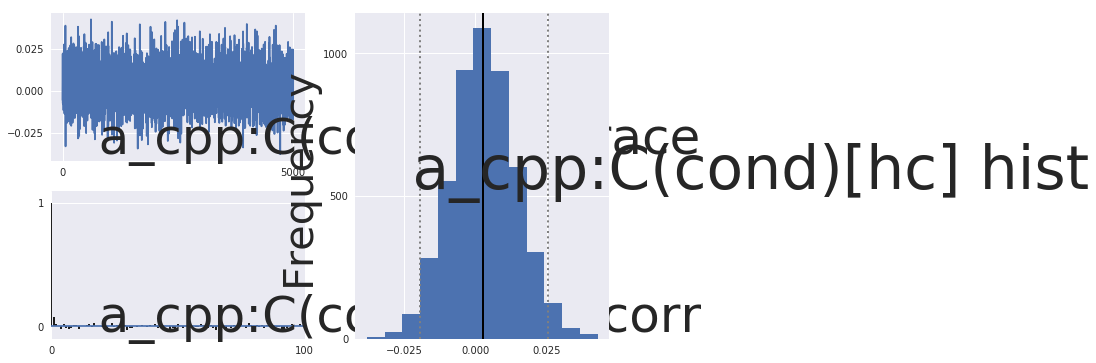

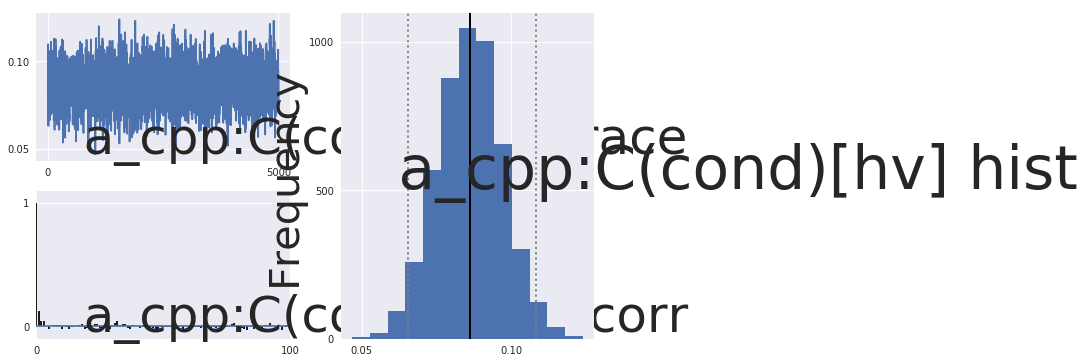

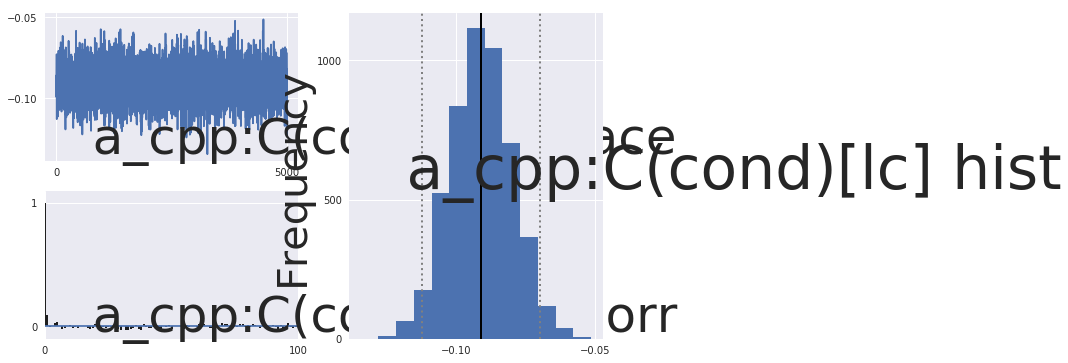

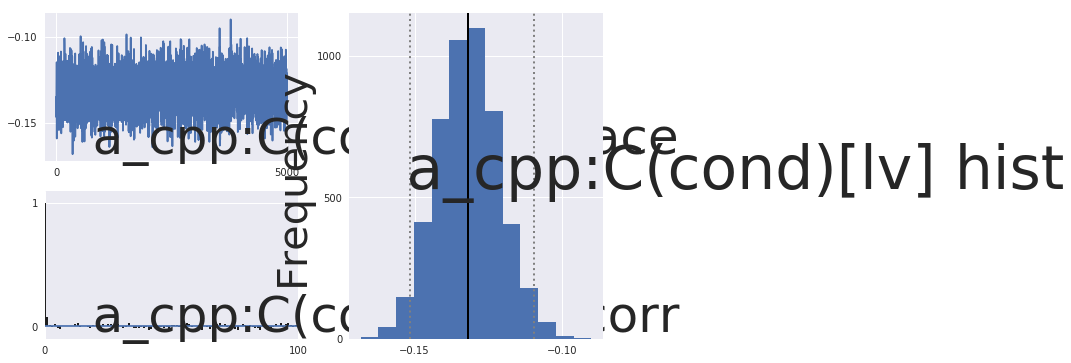

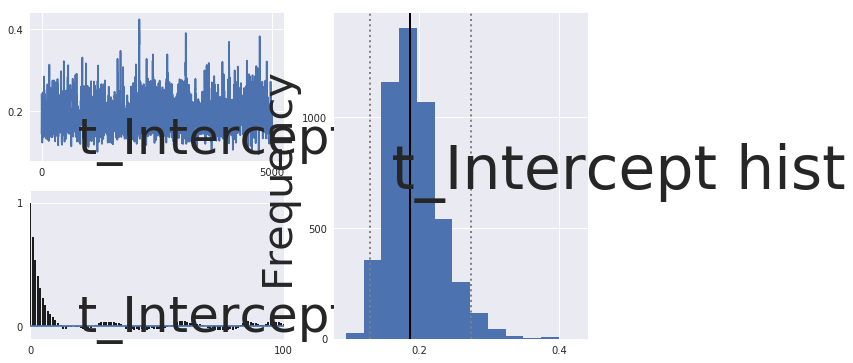

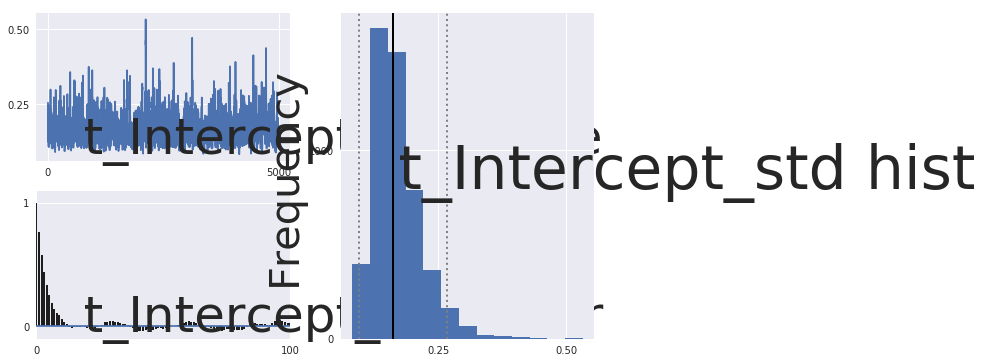

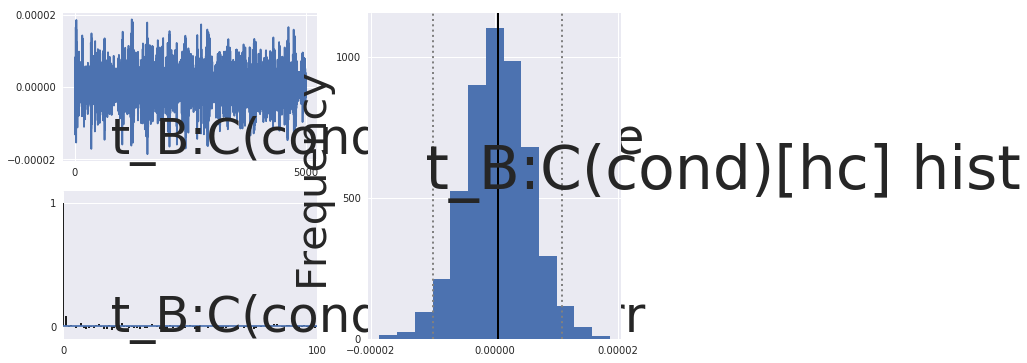

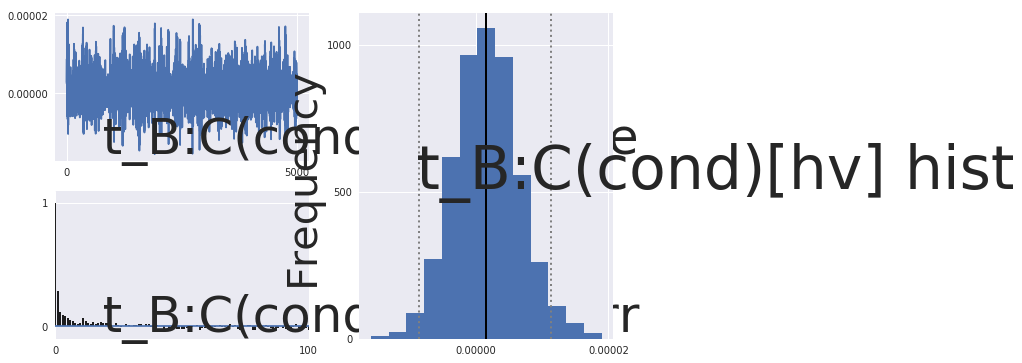

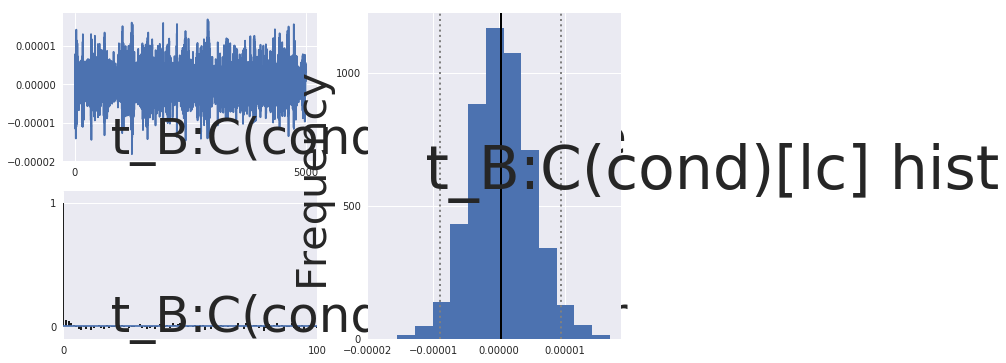

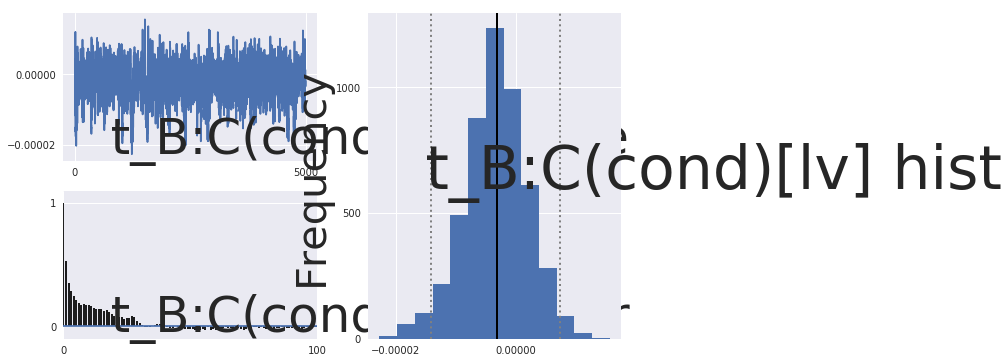

In [79]:
a_cpp_t_B_sim_reg.dic
a_cpp_t_B_sim_reg.plot_posteriors()

In [80]:
a_cpp_v_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['a_cpp_v_B'], include=include)
a_cpp_v_B_sim_reg.find_starting_values()
a_cpp_v_B_sim_reg.sample(n_samples,burn=n_burned_samples, dbname='a_cpp_v_B_sim_reg.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp:C(cond)[hc]', 'a_cpp:C(cond)[hv]', 'a_cpp:C(cond)[lc]', 'a_cpp:C(cond)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(cond)[hc]', 'v_B:C(cond)[hv]', 'v_B:C(cond)[lc]', 'v_B:C(cond)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 10001 of 10000 complete in 34276.2 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

Plotting v
Plotting v_std
Plotting t_Intercept
Plotting t_Intercept_std
Plotting t_cpp:C(cond)[hc]
Plotting t_cpp:C(cond)[hv]
Plotting t_cpp:C(cond)[lc]
Plotting t_cpp:C(cond)[lv]
Plotting a_Intercept
Plotting a_Intercept_std
Plotting a_B:C(cond)[hc]
Plotting a_B:C(cond)[hv]
Plotting a_B:C(cond)[lc]
Plotting a_B:C(cond)[lv]


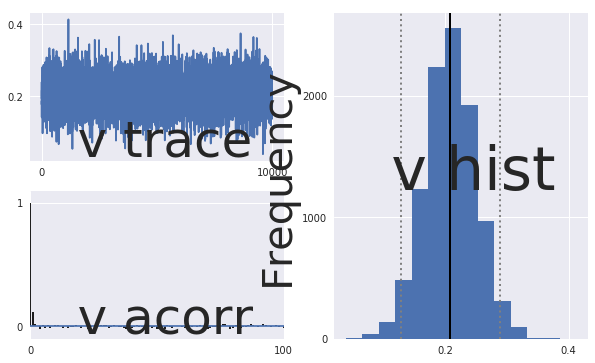

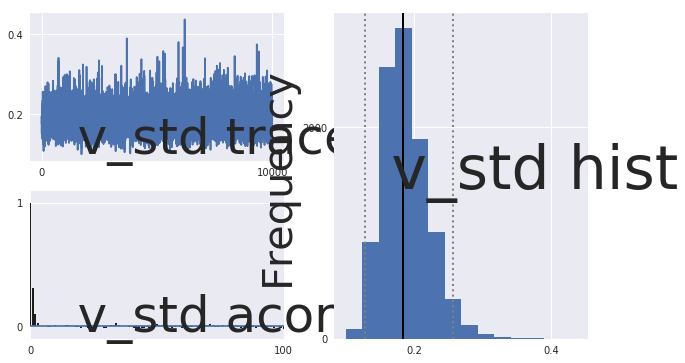

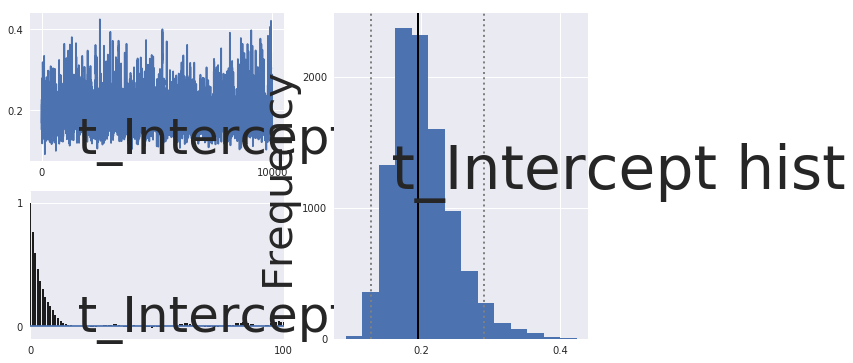

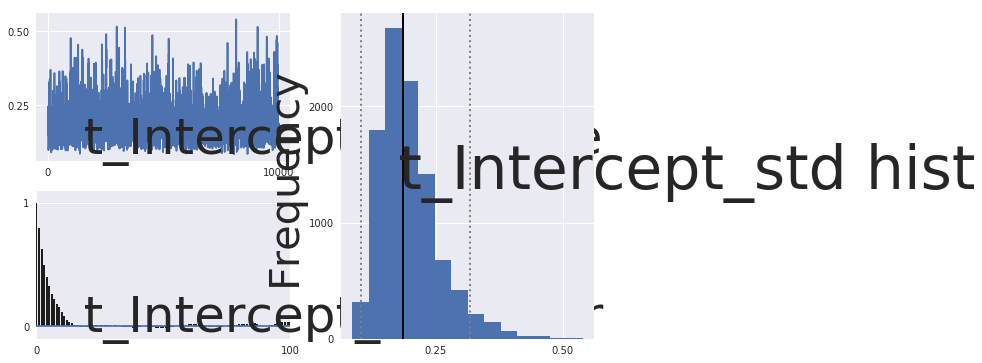

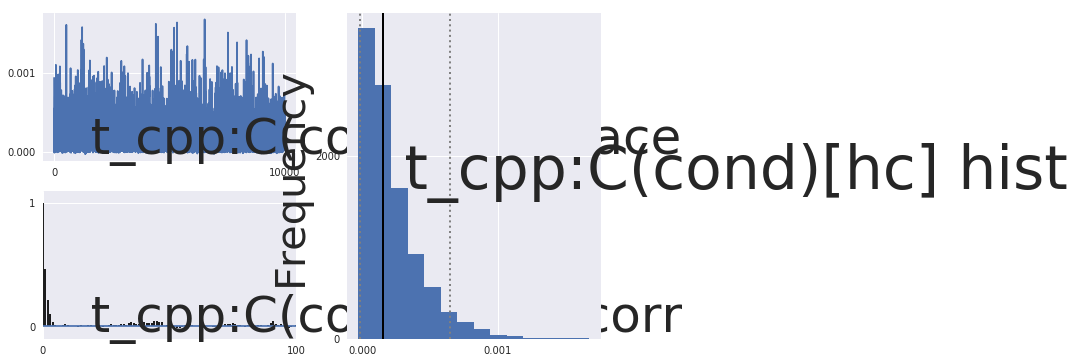

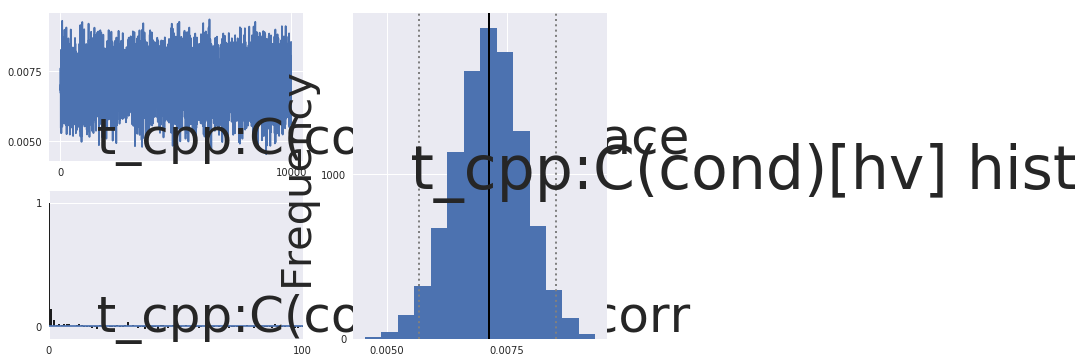

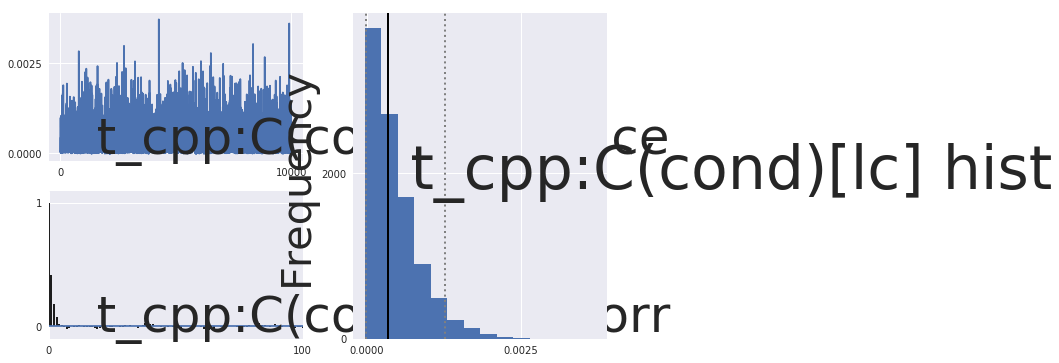

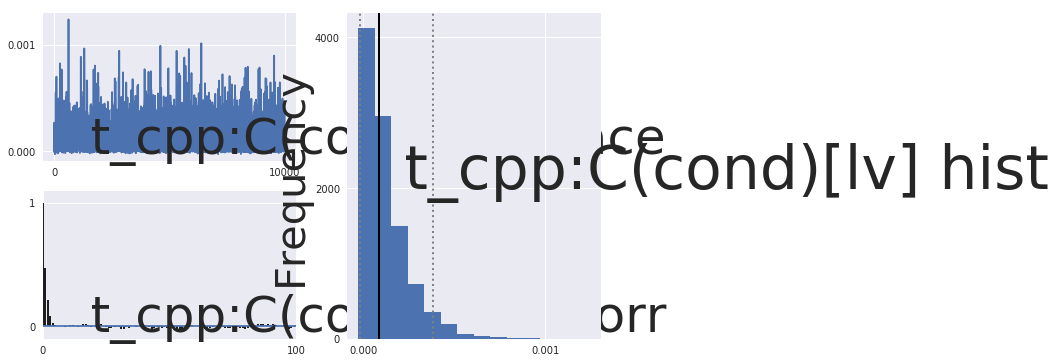

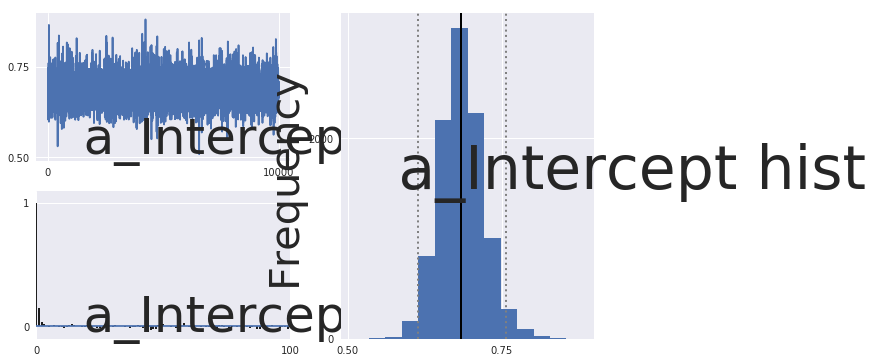

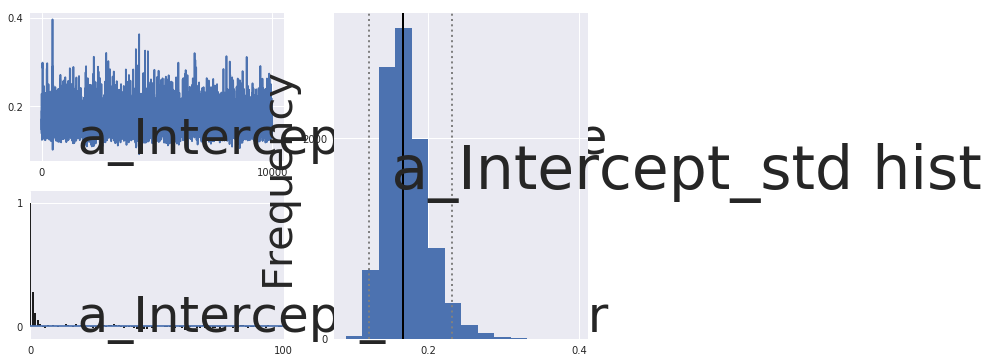

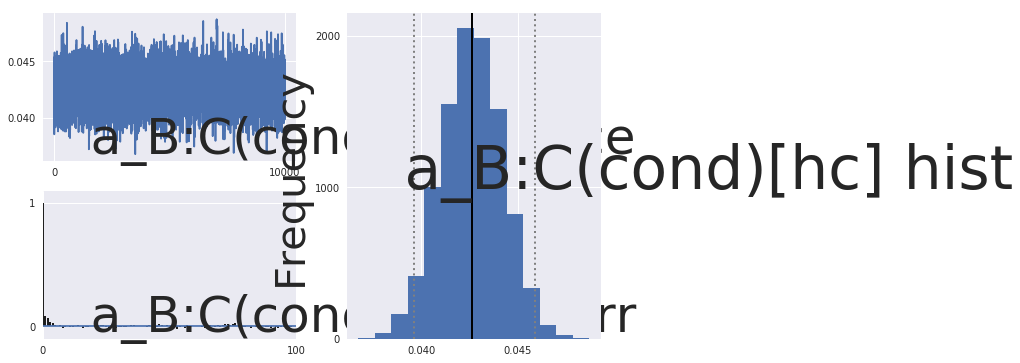

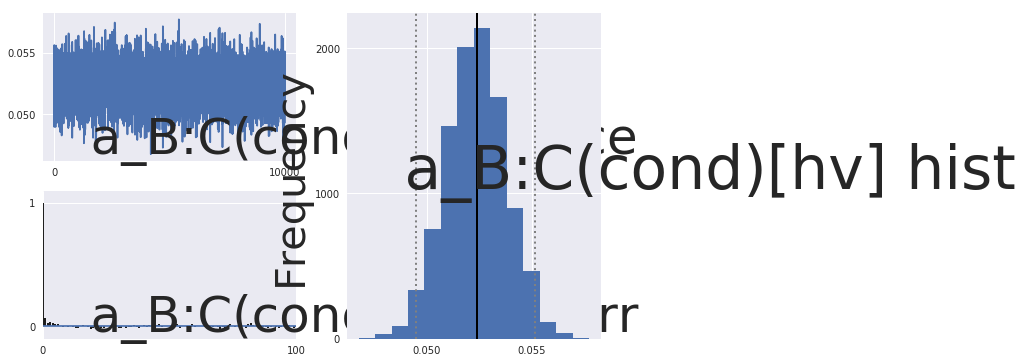

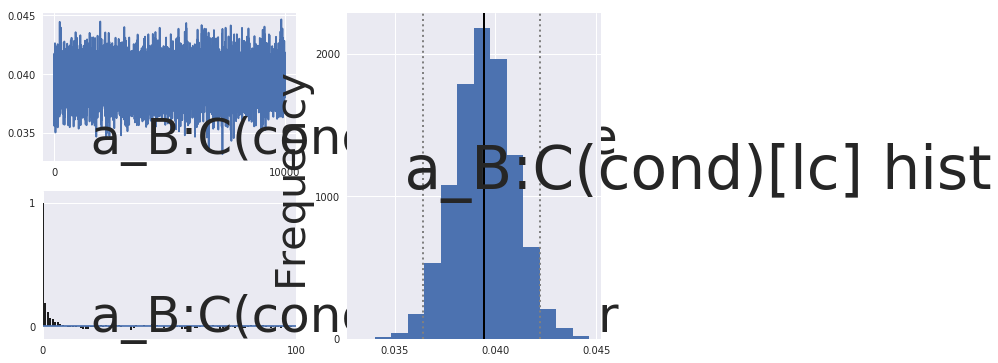

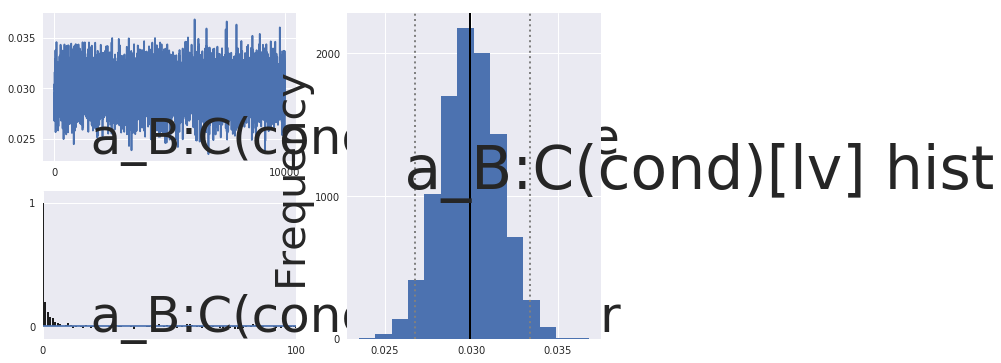

In [81]:
a_cpp_v_B_sim_reg.dic
t_cpp_a_B_sim_reg.plot_posteriors()

In [82]:
t_cpp_a_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['t_cpp_a_B'], include=include)
t_cpp_a_B_sim_reg.find_starting_values()
t_cpp_a_B_sim_reg.sample(n_samples,burn=n_burned_samples, dbname='t_cpp_a_B_sim_reg.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(cond)[hc]', 't_cpp:C(cond)[hv]', 't_cpp:C(cond)[lc]', 't_cpp:C(cond)[lv]']
Adding these covariates:
['a_Intercept', 'a_B:C(cond)[hc]', 'a_B:C(cond)[hv]', 'a_B:C(cond)[lc]', 'a_B:C(cond)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 10001 of 10000 complete in 44489.2 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

Plotting v
Plotting v_std
Plotting t_Intercept
Plotting t_Intercept_std
Plotting t_cpp:C(cond)[hc]
Plotting t_cpp:C(cond)[hv]
Plotting t_cpp:C(cond)[lc]
Plotting t_cpp:C(cond)[lv]
Plotting a_Intercept
Plotting a_Intercept_std
Plotting a_B:C(cond)[hc]
Plotting a_B:C(cond)[hv]
Plotting a_B:C(cond)[lc]
Plotting a_B:C(cond)[lv]


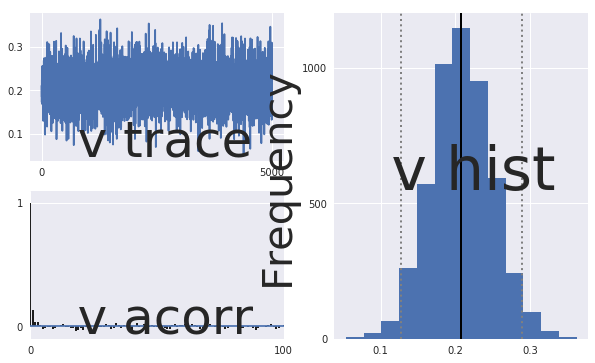

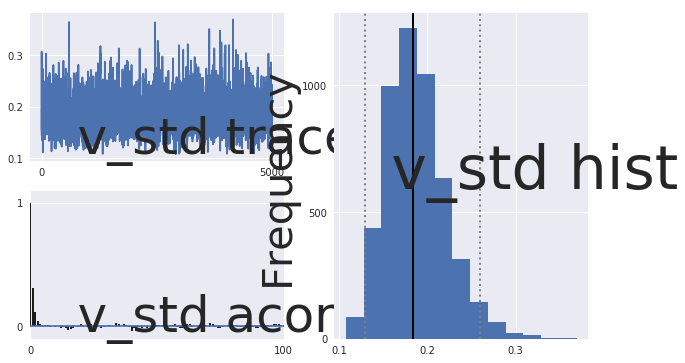

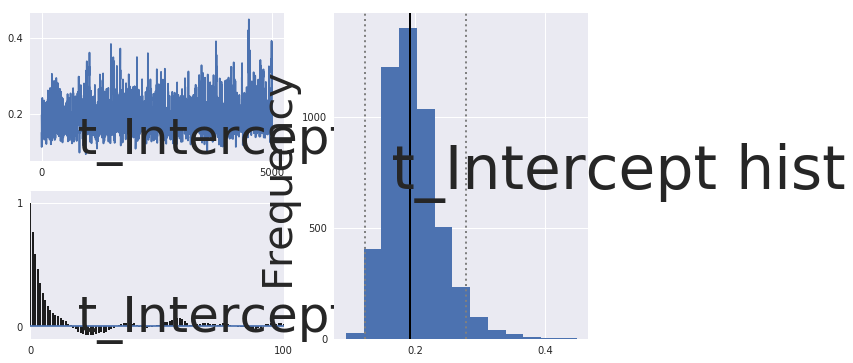

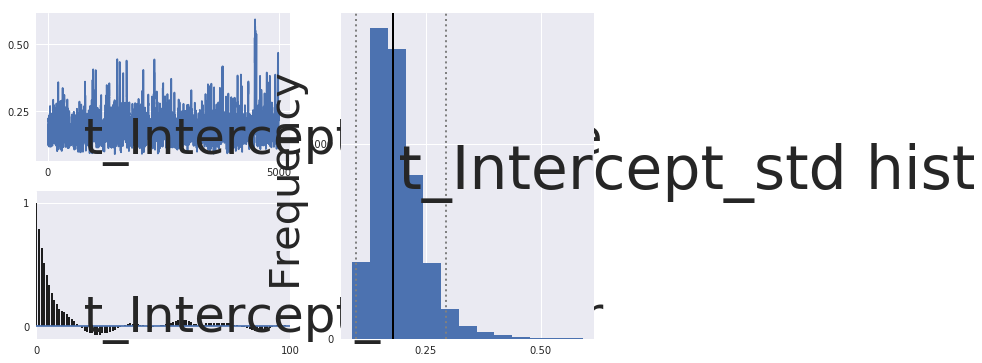

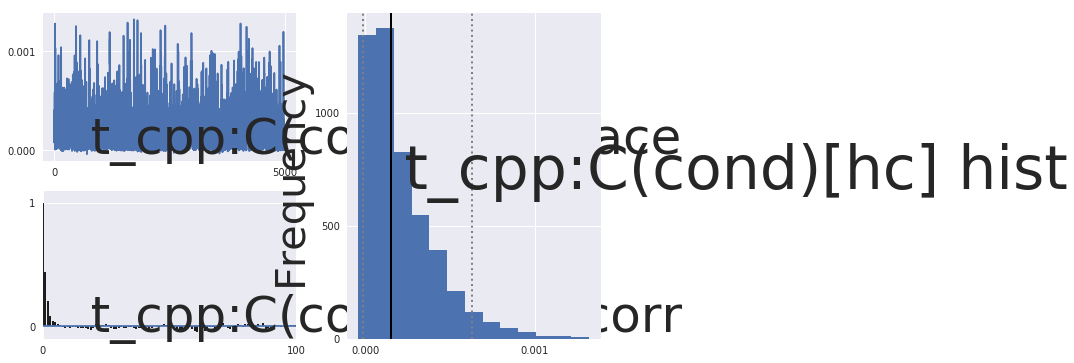

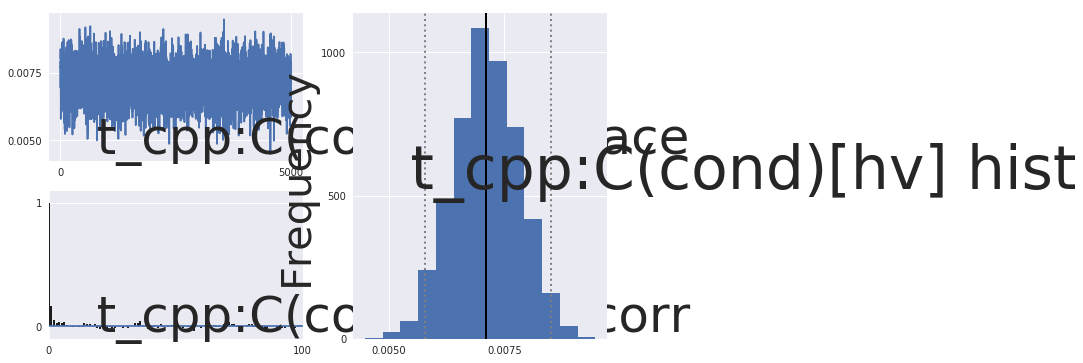

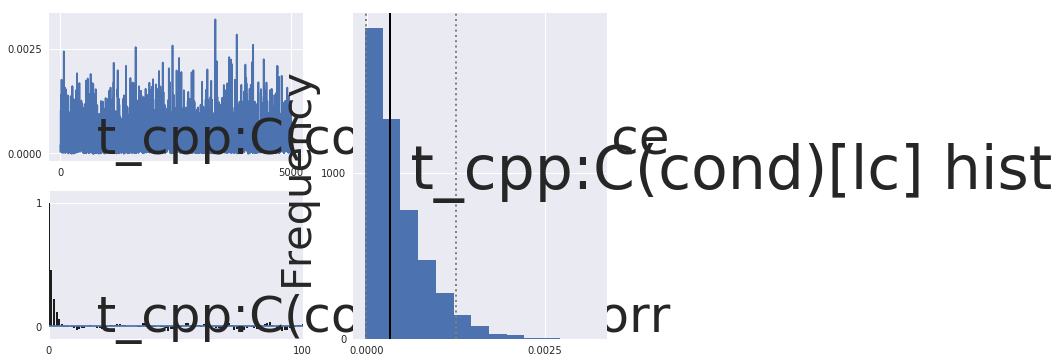

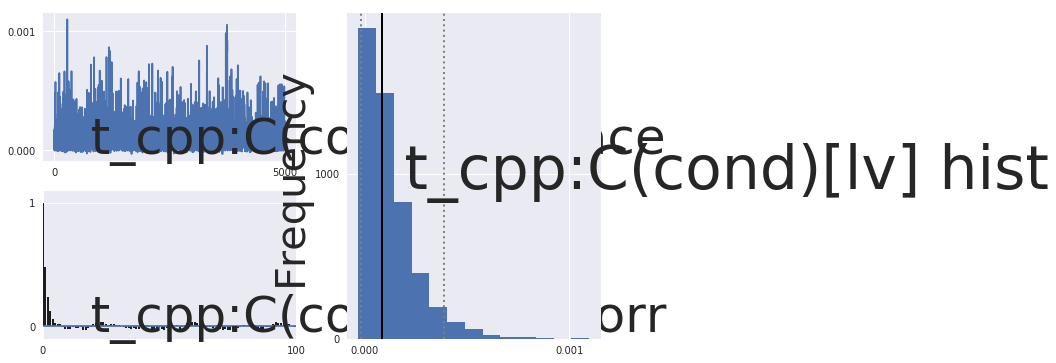

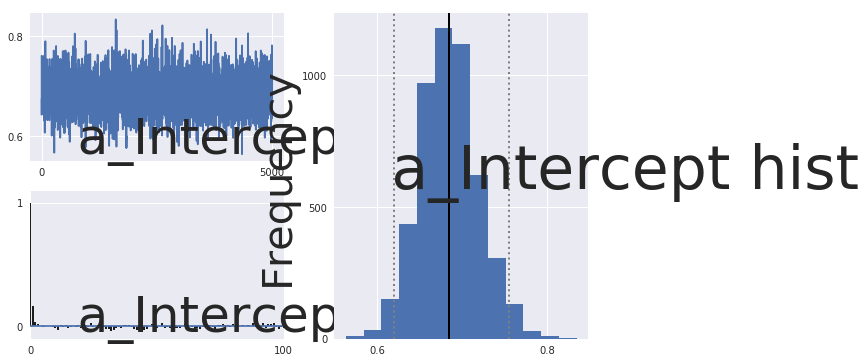

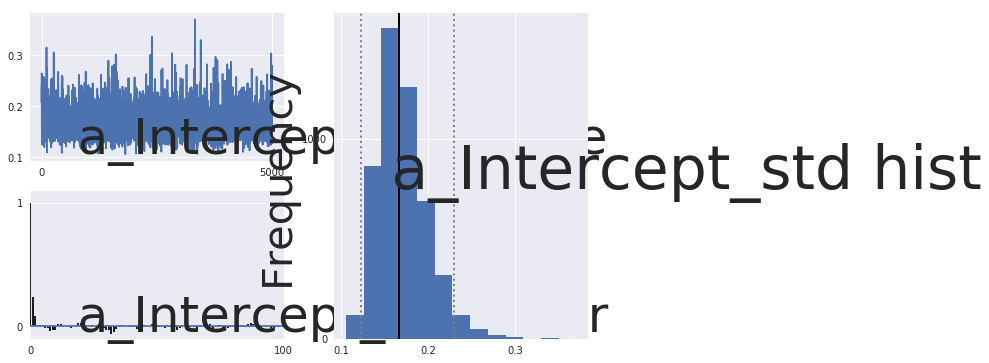

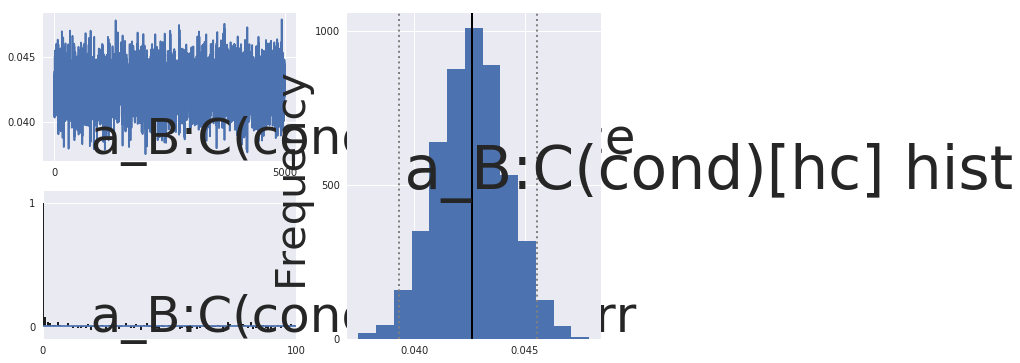

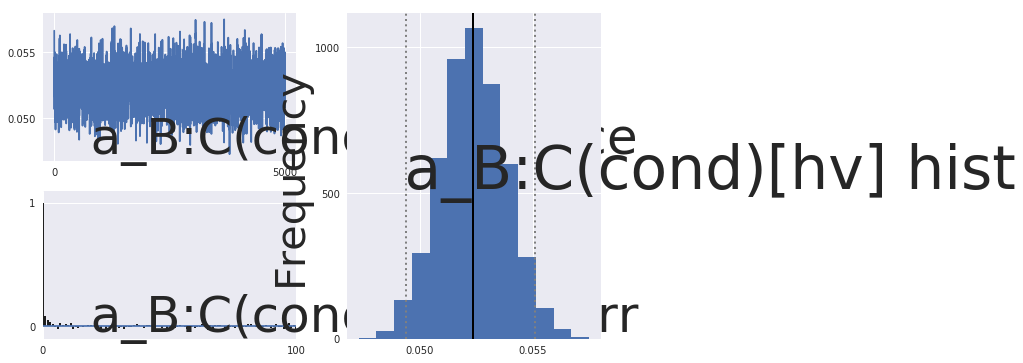

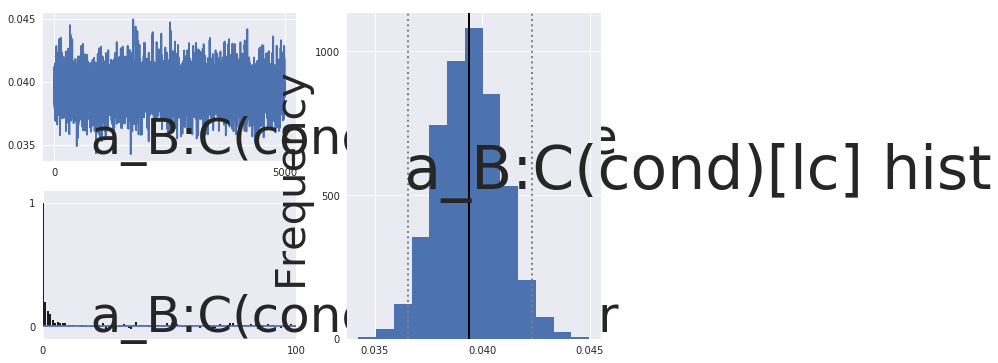

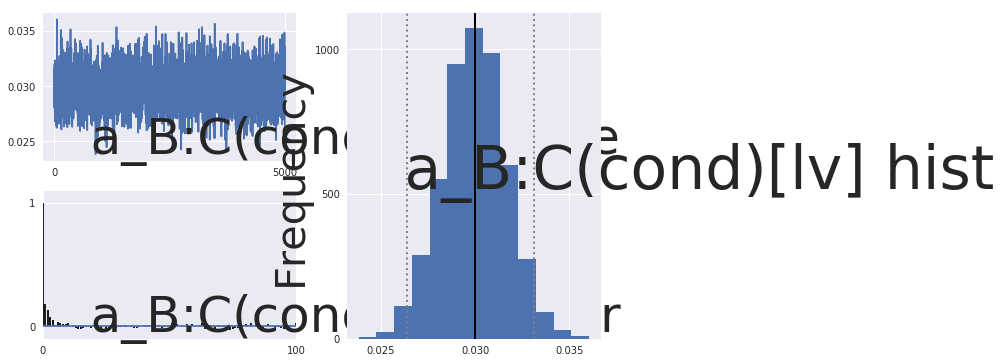

In [83]:
t_cpp_a_B_sim_reg.dic
t_cpp_a_B_sim_reg.plot_posteriors()

In [84]:
t_cpp_v_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['t_cpp_v_B'], include=include)
t_cpp_v_B_sim_reg.find_starting_values()
t_cpp_v_B_sim_reg.sample(n_samples,burn=n_burned_samples, dbname='t_cpp_v_B_sim_reg.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(cond)[hc]', 't_cpp:C(cond)[hv]', 't_cpp:C(cond)[lc]', 't_cpp:C(cond)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(cond)[hc]', 'v_B:C(cond)[hv]', 'v_B:C(cond)[lc]', 'v_B:C(cond)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 10001 of 10000 complete in 43311.9 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

In [ ]:
v_cpp_a_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['v_cpp_a_B'], include=include)
v_cpp_a_B_sim_reg.find_starting_values()
v_cpp_a_B_sim_reg.sample(n_samples,burn=n_burned_samples, dbname='v_cpp_a_B_sim_reg.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_cpp:C(cond)[hc]', 'v_cpp:C(cond)[hv]', 'v_cpp:C(cond)[lc]', 'v_cpp:C(cond)[lv]']
Adding these covariates:
['a_Intercept', 'a_B:C(cond)[hc]', 'a_B:C(cond)[hv]', 'a_B:C(cond)[lc]', 'a_B:C(cond)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------      31%                  ] 3114 of 10000 complete in 20863.7 sec

In [ ]:
v_cpp_t_B_sim_reg = hddm.HDDMRegressor(all_sim_data,model_dict['v_cpp_t_B'], include=include)
v_cpp_t_B_sim_reg.find_starting_values()
v_cpp_t_B_sim_reg.sample(n_samples,burn=n_burned_samples, dbname='v_cpp_t_B_sim_reg.db', db='pickle')

In [ ]:
dics = [t_cpp_v_B_subj_sim_reg.dic, v_a_t_B_subj_sim_reg.dic,
       v_a_B_t_cpp_subj_sim_reg.dic, v_B_a_cpp_subj_obs_reg.dic, v_cpp_a_B_subj_obs_reg.dic]
m_names = ['t_cpp_v_B', 'v_a_t_B', 'v_a_B_t_cpp',
          'v_B_a_cpp','v_cpp_a_B' ]

In [ ]:
plt.figure(figsize=(30,15))
sns.set(font_scale=3)  
plt.bar(m_names, dics)
plt.ylim(min(dics) - 40, max(dics) + 500)
plt.ylabel('DIC score')
plt.title('Stimulus coding sanity check: all pairwise combinations of parameters and learning signals+ generative model')

In [ ]:
# model_names_header = ', '.join(m_names)
# print_dics = np.column_stack(dics)
# np.savetxt(write_dir+'sim_test_gen_model.csv', print_dics, header=model_names_header, delimiter=',',comments='')